## CTB May

In [209]:
import pandas as pd
import openpyxl
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import rcParams
import re
import calendar
import os
from natsort import natsorted

import warnings
warnings.filterwarnings('ignore')

In [210]:
Startdate = "2020-01-01"
Enddate = "2021-06-01"
#Enddate = "2020-12-31

In [211]:
#getting granular level insights from date6\
def add_datepart(df, fldname, drop=True):
    
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
    attr = ['Year', 'Month', 'Week', 'Day','hour', 'Dayofweek', 'Dayofyear','weekofyear']
    
    for n in attr: 
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    
    df[targ_pre + "MonthName"] = df[targ_pre + "Month"].astype(int).apply(lambda x: calendar.month_abbr[x])
    df[targ_pre + "MonthKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Month"].astype(str)
    df[targ_pre + "WeekKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Week"].astype(str)
        
    if drop: 
        df.drop(fldname, axis=1, inplace=True)

In [212]:
def select_date_range(dataset, datevariable, startdate, enddate):
    print("old shape:", dataset.shape)
    dataset = dataset[(dataset[datevariable]>Startdate) & (dataset[datevariable]<Enddate)]
    print("new shape:", dataset.shape)
    return dataset

In [213]:
def Trend_Analysis_gb(dataset, Variables, DateVariable, GroupbyVariable, TrendType):

    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
       
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend   

In [214]:
def Trend_Analysis_pi(dataset, Variables, CountVariable,DateVariable, GroupbyVariable, TrendType):
    
    Trend = dataset[Variables].pivot_table(index=GroupbyVariable, columns=CountVariable, aggfunc=len, fill_value=0)
    Trend.reset_index(inplace=True)
        
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend
    

In [215]:
def Merge(left, left_on_var, right1, right1_on_var, right2, right2_on_var, how, ind, occurrence):
    merged1 = pd.merge(left, right1, left_on=left_on_var, right_on = right1_on_var, how = how,indicator=ind)
    if occurrence == 'double':
        merged1.drop(['_merge'], axis=1,inplace = True)
        merged2 = pd.merge(merged1, right2, left_on=left_on_var ,right_on = right2_on_var,how = how,indicator=ind)
        return merged2
    return merged1

In [216]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']
#33columns

In [217]:
#new data for march

In [218]:
ctb1 = pd.read_excel('ctb_ord140421.xls', sheet_name='Sheet 1')
print(ctb1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 33)


In [219]:
ctb2 = pd.read_excel('ctb_ord140421.xls', sheet_name='Sheet 2')
print(ctb2.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(10637, 33)


In [220]:
frames = [ctb1,ctb2]
ctb_data=pd.concat(frames)
ctb_data.shape

(75636, 33)

In [221]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']

In [222]:
ctb_data.columns=CTB_New_columns

In [223]:
add_datepart(ctb_data,'ORDER_DATE',False)

In [224]:
print(ctb_data.shape)
print(ctb_data.columns)
ctb_data.head()

(75636, 44)
Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey'],
      dtype='object')


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEMonth,ORDER_DATEWeek,ORDER_DATEDay,ORDER_DATEhour,ORDER_DATEDayofweek,ORDER_DATEDayofyear,ORDER_DATEweekofyear,ORDER_DATEMonthName,ORDER_DATEMonthKey,ORDER_DATEWeekKey
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,2020-01-28 19:50:08,Cancellation,...,1,5,28,19,1,28,5,Jan,2020_1,2020_5
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,2020-02-06 15:19:11,Cancellation,...,2,6,6,15,3,37,6,Feb,2020_2,2020_6
2,C1101,Central RO1,N1220,FRONTIER HYUNDAI,Mandeep Singh,Delhi,Delhi,ORD202011413365197,2020-01-14 11:04:27,Cancellation,...,1,3,14,11,1,14,3,Jan,2020_1,2020_3
3,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011511731225,2020-01-15 05:48:59,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3
4,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011550357047,2020-01-15 05:54:55,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3


In [225]:
CTB_not4 = ctb_data.loc[(ctb_data['ORDER_DATEMonthKey'] !='2020_4')].sort_values('ORDER_DATEMonth')
CTB_not4.shape

(63803, 44)

In [226]:
CTB_4 = ctb_data.loc[(ctb_data['ORDER_DATEMonthKey'] =='2020_4')].sort_values('ORDER_DATEMonth')
CTB_4.shape

(11833, 44)

In [227]:
apr_remove = pd.read_excel("AprilAnalysis.xlsx", sheet_name=' 4 SC orders frm 1')
apr_remove.shape

(7782, 17)

In [228]:
apr_merged = pd.merge(CTB_4, apr_remove['_ORDER _ID'], left_on='ORDER_ID', right_on = '_ORDER _ID', how = 'outer',indicator=True)
apr_merged.shape

(11833, 46)

In [229]:
apr_merged['_merge'].value_counts()

both          7782
left_only     4051
right_only       0
Name: _merge, dtype: int64

In [230]:
apr_custonly = apr_merged.loc[(apr_merged['_merge'] == 'left_only')]
print(apr_custonly.shape)
#apr_custonly.head(2)

(4051, 46)


In [231]:
CTB_april = apr_custonly.copy()
CTB_april.drop(['_merge'], axis=1,inplace = True)
print (CTB_april.shape)

(4051, 45)


In [232]:
frames = [CTB_not4,CTB_april]
CTB_sc_treat = pd.concat(frames)
print(CTB_sc_treat.shape)
CTB_sc_treat.columns

(67854, 45)


Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID'],
      dtype='object')

In [233]:
CTB_sc_treat_march = CTB_sc_treat[CTB_sc_treat['ORDER_DATEMonthKey']!='2021_4']
CTB_sc_treat_march.shape

(65792, 45)

In [234]:
## April Data

In [235]:
ctb_april = pd.read_excel("ctb_ord040521.xls")

WARNING *** file size (10110198) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [236]:
ctb_april.columns

Index(['_REGION _CODE', 'DELR_RGON_NAME', '_DEALER _ID', '_DEALER _NAME',
       '_ASSIGNED _SALES _CONSULTANT', '_STATE', '_CITY', '_ORDER _ID',
       '_ORDER _DATE', '_ORDER _STATUS', '_ORDER _STAGE',
       '_CONSULTANT _ASSISGN (_Y/_N)', '_CUSTOMER _NAME', '_CUSTOMER _MOBILE',
       '_CUSTOMER _EMAIL', '_MODEL', '_ENGINE', '_VARIANT', '_INTERIOR _COLOR',
       '_EXTERIOR _COLOR', '_FINANCE (_Y/_N)', '_LOAN _TYPE',
       '_FINANCE _STATUS', '_BOOKING (_Y/_N)', '_FINAL _PURCHASE _AMOUNT',
       '_BOOKING _AMOUNT', '_BALANCE _AMOUNT', '_TRADE-IN (_Y/_N)',
       '_DEALER _CODE (_Y/_N)', '_DEAL _CODE _VALUE', 'BOOKING_DATE',
       'INVC_CNFR_YN', 'PAY_AT_DELR_YN'],
      dtype='object')

In [237]:
ctb_april.columns=CTB_New_columns

In [238]:
add_datepart(ctb_april,'ORDER_DATE')

In [239]:
CTB_sc_treat_april = ctb_april[ctb_april['ORDER_DATEMonthKey']=='2021_4']


In [240]:
CTB_sc_treat_april.ORDER_ID.count()

3995

In [241]:
3995 - 3955 

40

In [242]:
3995 + 1966

5961

In [243]:
5921 - 1966

3955

In [244]:
CTB_sc_treat_april.drop_duplicates(subset='ORDER_ID', inplace=True)
CTB_sc_treat_april.shape

(3955, 43)

In [245]:
## May Data

In [246]:
ctb_may = pd.read_excel("ctb_ordf_040621_may.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [247]:
ctb_may.columns

Index(['_REGION _CODE', 'DELR_RGON_NAME', '_DEALER _ID', '_DEALER _NAME',
       '_ASSIGNED _SALES _CONSULTANT', '_STATE', '_CITY', '_ORDER _ID',
       '_ORDER _DATE', '_ORDER _STATUS', '_ORDER _STAGE',
       '_CONSULTANT _ASSISGN (_Y/_N)', '_CUSTOMER _NAME', '_CUSTOMER _MOBILE',
       '_CUSTOMER _EMAIL', '_MODEL', '_ENGINE', '_VARIANT', '_INTERIOR _COLOR',
       '_EXTERIOR _COLOR', '_FINANCE (_Y/_N)', '_LOAN _TYPE',
       '_FINANCE _STATUS', '_BOOKING (_Y/_N)', '_FINAL _PURCHASE _AMOUNT',
       '_BOOKING _AMOUNT', '_BALANCE _AMOUNT', '_TRADE-IN (_Y/_N)',
       '_DEALER _CODE (_Y/_N)', '_DEAL _CODE _VALUE', 'BOOKING_DATE',
       'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'CSTM_SLTN', 'DATE_OF_BRTH',
       'DATE_OF_ANVR'],
      dtype='object')

In [248]:
ctb_may.drop(['CSTM_SLTN','DATE_OF_BRTH','DATE_OF_ANVR'],axis=1,inplace=True)

In [249]:
ctb_may.columns=CTB_New_columns

In [250]:
add_datepart(ctb_may,'ORDER_DATE')

In [251]:
CTB_sc_treat_may = ctb_may[ctb_may['ORDER_DATEMonthKey']=='2021_5']

In [252]:
CTB_sc_treat_may.drop_duplicates(subset='ORDER_ID', inplace=True)
CTB_sc_treat_may.shape

(4192, 43)

In [253]:
CTB_sc_treat_may.shape

(4192, 43)

In [254]:
frames1 = [CTB_sc_treat_march,CTB_sc_treat_april,CTB_sc_treat_may]
ctb_data_raw = pd.concat(frames1)
ctb_data_raw.shape

(73939, 45)

In [255]:
#CTB_data = select_date_range(ctb_data_raw,"ORDER_DATE",Startdate,Enddate)

CTB_data = ctb_data_raw[(ctb_data_raw['ORDER_DATEMonthKey']>='2020_1')&(ctb_data_raw['ORDER_DATEMonthKey']<='2021_5')]
CTB_data.shape

(73939, 45)

In [256]:
#CTB_data.drop_duplicates(subset='ORDER_ID',inplace=True)

In [257]:
CTB_data.shape

(73939, 45)

In [50]:
73827 + 8192 + 610

82629

In [258]:
CTB_data.to_excel("CTB_data_till_May2021.xlsx")

In [52]:
# CTB Booking YES/NO

In [53]:
CTB_booking = CTB_data[CTB_data["BOOKING"]=="Y"]
print("CTB_booking : ", CTB_booking.shape)
CTB_booking_na = CTB_booking[CTB_booking["BOOKING_DATE"].notna()]
print("CTB_booking_na : ",CTB_booking_na.shape)

CTB_booking :  (3161, 45)
CTB_booking_na :  (2776, 45)


In [54]:
add_datepart(CTB_booking_na,'BOOKING_DATE',False)

In [55]:
CTB_booking_na.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'BOOKING_DATEYear', 'BOOKING_DATEMonth',
       'BOOKING_DATEWeek', 'BOOKING_DATEDay', 'BOOKING_DATEhour',
       'BOOKING_DATEDayofweek', 'BOOKING_DATEDayofye

## READING GDMS DATASET

In [56]:
# March

In [57]:
GDMS_data_raw1 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 1')
print(GDMS_data_raw1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 15)


In [58]:
GDMS_data_raw1.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,Y,NaN,NaN,B202001236,20201104.0
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,Y,NaN,NaN,B202016328,20201028.0


In [59]:
GDMS_data_raw2 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 2')

print(GDMS_data_raw2.shape)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(8112, 15)


In [60]:
GDMS_data_raw2.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,KUSALAVA HYUNDAI,S5A08,E202112248,20210316,9,Enquiry Follow up,FH,New Creta,Y,ORD2021031619520788,N,NaN,NaN,NaN,NaN
1,BLUE HYUNDAI,S8A04,E202114416,20210329,91,CTB-Booking Cancellation Request,SP,Venue,Y,ORD2021032913677914,N,NaN,NaN,NaN,NaN


In [61]:
#GDMS_data_raw3 = pd.read_excel("ctb_gdms040521.xls")

In [62]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_data_raw = pd.concat(frames)
print(GDMS_data_raw.shape)
GDMS_data_raw.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [63]:
GDMS_booking_raw = GDMS_data_raw.copy()
GDMS_booking_raw = GDMS_booking_raw[GDMS_booking_raw["BKNG_DATE"].notna()]
GDMS_booking_raw.shape

(5864, 15)

In [64]:
GDMS_booking_raw['BKNG_DATE_NEW'] = GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_raw['BKNG_DATE_NEW'].head(2)

0    2020-11-04
1    2020-10-28
Name: BKNG_DATE_NEW, dtype: object

In [65]:
GDMS_booking_raw['BKNG_DATE_NEW']

0       2020-11-04
1       2020-10-28
2       2020-05-15
3       2020-06-01
4       2020-10-06
           ...    
5859    2021-04-08
5860    2021-03-09
5861    2020-03-15
5862    2020-03-11
5863    2020-10-13
Name: BKNG_DATE_NEW, Length: 5864, dtype: object

GDMS_booking_raw = GDMS_booking_raw.loc[(GDMS_booking_raw['BKNG_DATE_NEW'] >= '2020-1-1')
                     & (GDMS_booking_raw['BKNG_DATE_NEW'] < '2021-4-1')]

In [66]:
add_datepart(GDMS_booking_raw,'BKNG_DATE_NEW',False)
print(GDMS_booking_raw.columns)
GDMS_booking = select_date_range(GDMS_booking_raw,"BKNG_DATE_NEW",Startdate,Enddate)

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')
old shape: (5864, 27)
new shape: (5864, 27)


In [67]:
#GDMS_booking.drop(['BKNG_DATE'], axis=1, inplace=True)

In [68]:
#GDMS_booking.drop_duplicates(keep='first', inplace=True)

In [69]:
GDMS_booking.shape

(5864, 27)

In [70]:
GDMS_booking.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [71]:
GDMS_booking.BKNG_DATE_NEW.max()

Timestamp('2021-04-13 00:00:00')

In [72]:
GDMS_booking_march = GDMS_booking[GDMS_booking['BKNG_DATE_NEWMonthKey']!='2021_4']
GDMS_booking_march.shape

(5553, 27)

In [73]:
#GDMS April

In [74]:
GDMS_booking_april = pd.read_excel("ctb_gdms040521.xls")
GDMS_booking_april.shape

WARNING *** file size (3799539) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(18028, 15)

In [75]:
GDMS_booking_april = GDMS_booking_april[GDMS_booking_april["BKNG_DATE"].notna()]
GDMS_booking_april.shape

(2044, 15)

In [76]:
GDMS_booking_april['BKNG_DATE_NEW'] = GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_april['BKNG_DATE_NEW'].head(2)

4    2021-01-28
5    2021-02-05
Name: BKNG_DATE_NEW, dtype: object

In [77]:
add_datepart(GDMS_booking_april,'BKNG_DATE_NEW')

In [78]:
GDMS_booking_april = GDMS_booking_april[GDMS_booking_april['BKNG_DATE_NEWMonthKey']=='2021_4']
GDMS_booking_april.shape

(580, 26)

In [79]:
# GDMS MAY

In [80]:
GDMS_booking_may = pd.read_excel("ctb_gdms_040621_may.xls")
GDMS_booking_may.shape

WARNING *** file size (4625657) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(22031, 15)

In [81]:
GDMS_booking_may = GDMS_booking_may[GDMS_booking_may["BKNG_DATE"].notna()]
GDMS_booking_may.shape

(2427, 15)

In [82]:
GDMS_booking_may['BKNG_DATE_NEW'] = GDMS_booking_may['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_may['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_may['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_may['BKNG_DATE_NEW'].head(2)

4    2021-01-28
5    2021-02-05
Name: BKNG_DATE_NEW, dtype: object

In [83]:
add_datepart(GDMS_booking_may,'BKNG_DATE_NEW')

In [84]:
GDMS_booking_may = GDMS_booking_may[GDMS_booking_may['BKNG_DATE_NEWMonthKey']=='2021_5']
GDMS_booking_may.shape

(373, 26)

In [85]:
frames2 = [GDMS_booking_march,GDMS_booking_april,GDMS_booking_may]
GDMS_Booking_new = pd.concat(frames2)
GDMS_Booking_new.shape

(6506, 27)

In [86]:
GDMS_Booking_new1 = GDMS_Booking_new[(GDMS_Booking_new['BKNG_DATE_NEWMonthKey']>='2020_1')&(GDMS_Booking_new['BKNG_DATE_NEWMonthKey']<='2021_5')]
GDMS_Booking_new1.shape

(6506, 27)

In [87]:
GDMS_Booking_new1.head()

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWMonth,BKNG_DATE_NEWWeek,BKNG_DATE_NEWDay,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,...,11,45,4,0,2,309,45,Nov,2020_11,2020_45
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,...,10,44,28,0,2,302,44,Oct,2020_10,2020_44
2,RUDRA HYUNDAI,E1203,E202015900,20200506,60,Booking Cancel,HQ,Grand i10 NIOS,Y,ORD20205650670724,...,5,20,15,0,4,136,20,May,2020_5,2020_20
3,AUSTIN HYUNDAI,E1213,E202014152,20200505,60,Booking Cancel,HQ,Grand i10 NIOS,Y,ORD20205573339296,...,6,23,1,0,0,153,23,Jun,2020_6,2020_23
4,RDB HYUNDAI,E1218,E202031920,20200916,60,Booking Cancel,ZZ,AURA,Y,ORD2020091613837813,...,10,41,6,0,1,280,41,Oct,2020_10,2020_41


In [88]:
GDMS_Booking_new.BKNG_DATE_NEWMonthKey.value_counts()

2020_10    951
2020_11    764
2021_3     605
2021_4     580
2021_2     567
2020_12    565
2021_1     517
2020_9     465
2020_8     376
2021_5     373
2020_7     317
2020_6     229
2020_5      90
2020_4      59
2020_3      39
2020_2       8
2020_1       1
Name: BKNG_DATE_NEWMonthKey, dtype: int64

In [89]:
GDMS_Booking_new.EQRY_REF_NO.count()

6506

## CTB AND GDMS MERGE

In [90]:
CTB_GDMS = pd.merge(CTB_data, GDMS_Booking_new, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS.shape)
CTB_GDMS['_merge'].value_counts()

(73963, 73)


left_only     67370
both           6569
right_only       24
Name: _merge, dtype: int64

In [91]:
## retail March

In [92]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_retail_march = pd.concat(frames)
print(GDMS_retail_march.shape)
GDMS_retail_march.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [93]:
GDMS_retail_march = GDMS_retail_march[GDMS_retail_march["RETAIL_DATE"].notna()]
GDMS_retail_march.shape

(2434, 15)

In [94]:
GDMS_retail_march['RETAIL_DATE_NEW'] = GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_march['RETAIL_DATE_NEW'].head(2)

138    2020-01-31
151    2020-07-07
Name: RETAIL_DATE_NEW, dtype: object

In [95]:
add_datepart(GDMS_retail_march,"RETAIL_DATE_NEW")

In [96]:
GDMS_retail_march.shape
GDMS_retail_march.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'RETAIL_DATE_NEWYear',
       'RETAIL_DATE_NEWMonth', 'RETAIL_DATE_NEWWeek', 'RETAIL_DATE_NEWDay',
       'RETAIL_DATE_NEWhour', 'RETAIL_DATE_NEWDayofweek',
       'RETAIL_DATE_NEWDayofyear', 'RETAIL_DATE_NEWweekofyear',
       'RETAIL_DATE_NEWMonthName', 'RETAIL_DATE_NEWMonthKey',
       'RETAIL_DATE_NEWWeekKey'],
      dtype='object')

In [97]:
GDMS_retail_march.drop_duplicates(subset='EQRY_REF_NO',inplace=True)

In [98]:
GDMS_retail_march = GDMS_retail_march[GDMS_retail_march['RETAIL_DATE_NEWMonthKey']!='2021_4']
GDMS_retail_march.shape

(2352, 26)

In [99]:
##  retail April 

In [100]:
GDMS_retail_april = pd.read_excel("ctb_gdms040521.xls")
GDMS_retail_april.shape

WARNING *** file size (3799539) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(18028, 15)

In [101]:
GDMS_retail_april = GDMS_retail_april[GDMS_retail_april["RETAIL_DATE"].notna()]
GDMS_retail_april.shape

(576, 15)

In [102]:
GDMS_retail_april['RETAIL_DATE_NEW'] = GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_april['RETAIL_DATE_NEW'].head(2)

4    2021-03-20
5    2021-03-11
Name: RETAIL_DATE_NEW, dtype: object

In [103]:
add_datepart(GDMS_retail_april,"RETAIL_DATE_NEW")

In [104]:
GDMS_retail_april = GDMS_retail_april[GDMS_retail_april['RETAIL_DATE_NEWMonthKey']=='2021_4']
GDMS_retail_april.shape

(211, 26)

In [105]:
GDMS_retail_april.shape

(211, 26)

In [106]:
#GDMS_retail_april.drop_duplicates(subset='EQRY_REF_NO',inplace=True)

In [107]:
## retail may

In [108]:
GDMS_retail_may = pd.read_excel("ctb_gdms_040621_may.xls")
GDMS_retail_may.shape

WARNING *** file size (4625657) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(22031, 15)

In [109]:
GDMS_retail_may = GDMS_retail_may[GDMS_retail_may["RETAIL_DATE"].notna()]
GDMS_retail_may.shape

(693, 15)

In [110]:
GDMS_retail_may['RETAIL_DATE_NEW'] = GDMS_retail_may['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_may['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_may['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_may['RETAIL_DATE_NEW'].head(2)

4    2021-03-20
5    2021-03-11
Name: RETAIL_DATE_NEW, dtype: object

In [111]:
add_datepart(GDMS_retail_may,"RETAIL_DATE_NEW")

In [112]:
GDMS_retail_may = GDMS_retail_may[GDMS_retail_may['RETAIL_DATE_NEWMonthKey']=='2021_5']
GDMS_retail_may.shape

(112, 26)

In [113]:
GDMS_retail_may.drop_duplicates(subset='EQRY_REF_NO',inplace=True)

In [114]:
frames4 = [GDMS_retail_march,GDMS_retail_april,GDMS_retail_may]

In [115]:
GDMS_RETAIL = pd.concat(frames4)
GDMS_RETAIL.shape

(2675, 26)

In [116]:
CTB_GDMS_RETAIL = pd.merge(CTB_data, GDMS_RETAIL, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS_RETAIL.shape)
CTB_GDMS_RETAIL['_merge'].value_counts()

(73950, 72)


left_only     71259
both           2680
right_only       11
Name: _merge, dtype: int64

In [117]:
CTB_GDMS_RETAIL = CTB_GDMS_RETAIL[CTB_GDMS_RETAIL["_merge"]!="left_only"]

In [118]:
CTB_GDMS_RETAIL.shape

(2691, 72)

In [119]:
GDMS_retail_raw = CTB_GDMS_RETAIL[(CTB_GDMS_RETAIL["RETAIL_DATE"].notna()) & (CTB_GDMS_RETAIL['EQRY_STAT']==45)]
print(GDMS_retail_raw.shape)
GDMS_retail_raw.head(2)

(2647, 72)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,RETAIL_DATE_NEWWeek,RETAIL_DATE_NEWDay,RETAIL_DATE_NEWhour,RETAIL_DATE_NEWDayofweek,RETAIL_DATE_NEWDayofyear,RETAIL_DATE_NEWweekofyear,RETAIL_DATE_NEWMonthName,RETAIL_DATE_NEWMonthKey,RETAIL_DATE_NEWWeekKey,_merge
31,E1101,East RO1,E1A05,SAINI HYUNDAI,Manish Kr. Ray,West Bengal,Kolkata,ORD2021011715869051,2021-01-17 19:32:10,Complete,...,9.0,5.0,0.0,4.0,64.0,9.0,Mar,2021_3,2021_9,both
44,W1104,West RO4,W5716,BADRIKA HYUNDAI,Ajit Sharma,Madhya Pradesh,Singrauli,ORD2021011312548952,2021-01-13 16:29:51,Complete,...,7.0,18.0,0.0,3.0,49.0,7.0,Feb,2021_2,2021_7,both


In [120]:
GDMS_Booking = GDMS_Booking_new.copy()
GDMS_retail = GDMS_retail_raw.copy()

In [121]:
GDMS_retail.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO',
       'EQRY_DATE', 'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE',
       'EQCR_MODEL_NAME', 'EQRY_NEWCAR_Y

In [122]:
GDMS_retail.drop_duplicates(subset='EQRY_REF_NO', inplace=True)

In [123]:
GDMS_retail.RETAIL_DATE_NEWMonthKey.value_counts()

2020_12    297
2020_11    295
2020_10    273
2021_1     244
2021_3     242
2021_2     229
2020_8     219
2020_9     212
2021_4     209
2020_7     159
2021_5     110
2020_6     106
2020_5      30
2020_2       3
2020_3       2
2020_1       1
Name: RETAIL_DATE_NEWMonthKey, dtype: int64

In [124]:
GDMS_retail.to_excel("CTB_Retail_May.xlsx")

In [125]:
GDMS_Booking.to_excel("CTB_Booking_May.xlsx")

### Monthly/Weekly/Hourly Analysis

In [126]:
#Monthly Enquiry trend
Monthly_trend_Enq = Trend_Analysis_gb(ctb_data_raw,['ORDER_ID','ORDER_DATEMonthKey'],'ORDER_DATEMonthKey','ORDER_DATEMonthKey','Monthly')
Monthly_trend_Enq.columns = ["ORDER_DATEMonthKey","Enquiry Count"]



In [127]:
#Monthly Booking trend
Monthly_trend_Booking = Trend_Analysis_pi(GDMS_Booking,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
Monthly_trend_Booking.columns = ['BKNG_DATE_NEWMonthKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Monthly Retail trend
Monthly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWMonthKey'],'RETAIL_DATE_NEWMonthKey','RETAIL_DATE_NEWMonthKey','Monthly')
Monthly_trend_Retail.columns = ["RETAIL_DATE_NEWMonthKey","Retail Count"]


In [128]:
Monthly_trend_Booking

,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_1,1,0
1,2020_10,416,535
2,2020_11,403,361
3,2020_12,383,182
4,2020_2,8,0
5,2020_3,31,8
6,2020_4,9,50
7,2020_5,50,40
8,2020_6,162,67
9,2020_7,244,73


In [129]:
181 +192 

373

In [130]:
Monthly_trend_Retail['Retail Count']

0       1
1     273
2     295
3     297
4       3
5       2
6      30
7     106
8     159
9     219
10    212
11    244
12    229
13    242
14    209
15    110
Name: Retail Count, dtype: int64

In [131]:
Monthly_trend_Enq 

,ORDER_DATEMonthKey,Enquiry Count
0,2020_1,191
1,2020_10,8590
2,2020_11,6887
3,2020_12,6603
4,2020_2,350
5,2020_3,688
6,2020_4,4051
7,2020_5,2224
8,2020_6,5888
9,2020_7,4902


In [132]:
4192 + 610

4802

In [133]:
#Weekly Enquiry trend
Weekly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEWeekKey'],'ORDER_DATEWeekKey','ORDER_DATEWeekKey','Weekly')
Weekly_trend_Enq.columns = ['ORDER_DATEWeekKey','Enquiry Count']

#Weekly Booking trend
Weekly_trend_Booking = Trend_Analysis_pi(GDMS_booking,['CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey','BKNG_DATE_NEWWeekKey','Weekly')
Weekly_trend_Booking.columns = ['BKNG_DATE_NEWWeekKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Weekly Retail trend
Weekly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWWeekKey'],'RETAIL_DATE_NEWWeekKey','RETAIL_DATE_NEWWeekKey','Weekly')
Weekly_trend_Retail.columns = ["RETAIL_DATE_NEWWeekKey","Retail Count"]


In [134]:
#Hourly_trend_booking
Hourly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEhour'],'ORDER_DATEhour','ORDER_DATEhour','Hourly')
Hourly_trend_Enq.columns = ['Range_name','Enquiry Count']

Hourly_trend_booking = Trend_Analysis_gb(CTB_booking_na,['ORDER_ID','BOOKING_DATEhour'],'BOOKING_DATEhour','BOOKING_DATEhour','Hourly')
Hourly_trend_booking.columns = ["Range_name","Booking Count"]


In [135]:
Weekly_trend_Enq

,ORDER_DATEWeekKey,Enquiry Count
0,2020_10,105
1,2020_11,102
2,2020_12,160
3,2020_13,255
4,2020_14,287
...,...,...
69,2021_53,522
70,2021_6,1418
71,2021_7,1167
72,2021_8,1002


In [136]:
Weekly_trend_Booking

,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_10,9,0
1,2020_11,10,2
2,2020_12,7,3
3,2020_13,5,3
4,2020_14,0,6
...,...,...,...
60,2021_53,7,21
61,2021_6,76,80
62,2021_7,68,62
63,2021_8,116,56


In [137]:
Weekly_trend_Retail

,RETAIL_DATE_NEWWeekKey,Retail Count
0,2020_12,2
1,2020_19,2
2,2020_20,5
3,2020_21,9
4,2020_22,14
...,...,...
58,2021_53,5
59,2021_6,53
60,2021_7,55
61,2021_8,72


In [138]:
Hourly_trend_Enq

,Range_name,Enquiry Count
0,0-2,2850
1,10-12,8972
2,12-14,9146
3,14-16,9333
4,16-18,8337
5,18-20,8621
6,2-4,1094
7,20-22,8692
8,22-24,6953
9,4-6,1155


In [139]:
Hourly_trend_Enq['Enquiry Count'].sum()

73939

In [140]:
Hourly_trend_booking['Booking Count'].sum()

2776

In [141]:
Monthly_Trend_merg = Merge(Monthly_trend_Enq,'ORDER_DATEMonthKey',Monthly_trend_Booking,'BKNG_DATE_NEWMonthKey',Monthly_trend_Retail,'RETAIL_DATE_NEWMonthKey','outer',True,'double')
Monthly_Trend_merg[['Year','Month']] = Monthly_Trend_merg.ORDER_DATEMonthKey.str.split("_",expand=True)

Monthly_Trend_merg

,ORDER_DATEMonthKey,Enquiry Count,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWMonthKey,Retail Count,_merge,Year,Month
0,2020_1,191,2020_1,1,0,2020_1,1.0,both,2020,1
1,2020_10,8590,2020_10,416,535,2020_10,273.0,both,2020,10
2,2020_11,6887,2020_11,403,361,2020_11,295.0,both,2020,11
3,2020_12,6603,2020_12,383,182,2020_12,297.0,both,2020,12
4,2020_2,350,2020_2,8,0,2020_2,3.0,both,2020,2
5,2020_3,688,2020_3,31,8,2020_3,2.0,both,2020,3
6,2020_4,4051,2020_4,9,50,NaN,NaN,left_only,2020,4
7,2020_5,2224,2020_5,50,40,2020_5,30.0,both,2020,5
8,2020_6,5888,2020_6,162,67,2020_6,106.0,both,2020,6
9,2020_7,4902,2020_7,244,73,2020_7,159.0,both,2020,7


In [142]:
Monthly_Trend = Monthly_Trend_merg[["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Monthly_Trend

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_1,2020,1,191,0,1,1.0
1,2020_10,2020,10,8590,535,416,273.0
2,2020_11,2020,11,6887,361,403,295.0
3,2020_12,2020,12,6603,182,383,297.0
4,2020_2,2020,2,350,0,8,3.0
5,2020_3,2020,3,688,8,31,2.0
6,2020_4,2020,4,4051,50,9,NaN
7,2020_5,2020,5,2224,40,50,30.0
8,2020_6,2020,6,5888,67,162,106.0
9,2020_7,2020,7,4902,73,244,159.0


In [143]:
Monthly_Trend_final_added = Monthly_Trend.copy()
Monthly_Trend_final_added["CRM Booking"] = 0
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 114,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 156,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 122,Monthly_Trend_final_added["CRM Booking"])

Monthly_Trend_final_added["CRM Retail"] = 0
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 1,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 66,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 112,Monthly_Trend_final_added["CRM Retail"])


Monthly_Trend_final_added["Financial_enquiry"] = 0
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"),2712,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 727,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 1346,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1441,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_4"), 1966,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_5"), 610,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Visitors"] = 0

Monthly_Trend_final_added["Visitors"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),634892,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"),43962 ,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 739592,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_7"), 1743236,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_8"), 281136,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_9"), 525295,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_10"), 966755,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_11"), 953487,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"), 1152471,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 794194,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 704709,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1101148,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_4"), 894081,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_5"), 1730711,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["CTB Registration"] = 0
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_1"),120,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_2"),276,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_3"),664,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),4487,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_5"),1657,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_6"),5127,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_7"),5004,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_8"),4012,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_9"),5694,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_10"),8000,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_11"),5874,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_12"),6236,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_1"),4057,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_2"),3835,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_3"),4403,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_4"),3768,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_5"),3074,Monthly_Trend_final_added["CTB Registration"])






Monthly_Trend_final_added["Online Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total CTB Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CTB_BOOKING_N"]
Monthly_Trend_final_added["Total Booking"] = Monthly_Trend_final_added["CTB_BOOKING_N"]+ Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total Retail"] = Monthly_Trend_final_added["Retail Count"]+ Monthly_Trend_final_added["CRM Retail"]
Monthly_Trend_final_added["Total Enquiry"] = Monthly_Trend_final_added["Enquiry Count"]+Monthly_Trend_final_added["Financial_enquiry"]
Monthly_Trend_final_added.fillna(0.0,inplace=True)
Monthly_Trend_final_added["Retail Conversion Ratio"] = (Monthly_Trend_final_added["Total Retail"]/Monthly_Trend_final_added["Enquiry Count"])
Monthly_Trend_final_added
#np.where((CTB_Registrations['Month_Name'] == 'Apr') & (CTB_Registrations['year'] == 2020 ) , 4487,CTB_Registrations['Registration_Count'] )

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781
2,2020_11,2020,11,6887,361,403,295.0,0,0,0,953487,5874,361,764,764,295.0,6887,0.042834
3,2020_12,2020,12,6603,182,383,297.0,0,0,2712,1152471,6236,182,565,565,297.0,9315,0.044980
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,159.0,0,0,0,1743236,5004,73,317,317,159.0,4902,0.032436


In [144]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
Monthly_Trend_final_added = Monthly_Trend_final_added.reindex(index=order_by_index(Monthly_Trend_final_added.index, index_natsorted(Monthly_Trend_final_added.ORDER_DATEMonthKey)))

In [145]:
Monthly_Trend_final_added

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,159.0,0,0,0,1743236,5004,73,317,317,159.0,4902,0.032436
10,2020_8,2020,8,4859,101,275,219.0,0,0,0,281136,4012,101,376,376,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,212.0,0,0,0,525295,5694,108,465,465,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781


In [146]:
Monthly_Trend_final_added.to_excel("CTB_monthly_stats_may.xlsx")

In [147]:
monthlist = ["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Total CTB Booking","CRM Booking","Online Booking","Financial_enquiry","Total Booking","CRM Retail","Total Retail","Total Enquiry","Retail Conversion Ratio"]
Monthly_Trend_final = Monthly_Trend_final_added[monthlist]
Monthly_Trend_final

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Total CTB Booking,CRM Booking,Online Booking,Financial_enquiry,Total Booking,CRM Retail,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1,0,0,0,1,0,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,8,0,0,0,8,0,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,39,0,8,0,39,0,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,59,114,164,0,173,1,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,90,156,196,0,246,66,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,229,122,189,0,351,112,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,317,0,73,0,317,0,159.0,4902,0.032436
10,2020_8,2020,8,4859,101,275,376,0,101,0,376,0,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,465,0,108,0,465,0,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,951,0,535,0,951,0,273.0,8590,0.031781


In [148]:
Weekly_Trend_final = Merge(Weekly_trend_Enq,'ORDER_DATEWeekKey',Weekly_trend_Booking,'BKNG_DATE_NEWWeekKey',Weekly_trend_Retail,'RETAIL_DATE_NEWWeekKey','outer',True,'double')
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWWeekKey,Retail Count,_merge
0,2020_10,105,2020_10,9.0,0.0,NaN,NaN,left_only
1,2020_11,102,2020_11,10.0,2.0,NaN,NaN,left_only
2,2020_12,160,2020_12,7.0,3.0,2020_12,2.0,both
3,2020_13,255,2020_13,5.0,3.0,NaN,NaN,left_only
4,2020_14,287,2020_14,0.0,6.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
69,2021_53,522,2021_53,7.0,21.0,2021_53,5.0,both
70,2021_6,1418,2021_6,76.0,80.0,2021_6,53.0,both
71,2021_7,1167,2021_7,68.0,62.0,2021_7,55.0,both
72,2021_8,1002,2021_8,116.0,56.0,2021_8,72.0,both


In [149]:
Weekly_Trend_final = Weekly_Trend_final[["ORDER_DATEWeekKey","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_10,105,0.0,9.0,NaN
1,2020_11,102,2.0,10.0,NaN
2,2020_12,160,3.0,7.0,2.0
3,2020_13,255,3.0,5.0,NaN
4,2020_14,287,6.0,0.0,NaN
...,...,...,...,...,...
69,2021_53,522,21.0,7.0,5.0
70,2021_6,1418,80.0,76.0,53.0
71,2021_7,1167,62.0,68.0,55.0
72,2021_8,1002,56.0,116.0,72.0


In [150]:
Weekly_Trend_final1 = Weekly_Trend_final.copy()
Weekly_Trend_final1["CRM Booking"] = 0
Weekly_Trend_final1["CRM Retail"] = 0
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_14"), 22,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_15"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_17"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_18"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 2,Weekly_Trend_final1["CRM Booking"])

Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 1,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 8,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1.fillna(0, inplace = True)
Weekly_Trend_final1["Total Booking"] = Weekly_Trend_final1["CTB_BOOKING_N"]+ Weekly_Trend_final1["CTB_BOOKING_Y"]+Weekly_Trend_final1["CRM Booking"]
Weekly_Trend_final1["Total Retail"] = Weekly_Trend_final1["Retail Count"]+ Weekly_Trend_final1["CRM Retail"]
Weekly_Trend_final1["Retail Conversion Ratio"] = (Weekly_Trend_final1["Total Retail"]/Weekly_Trend_final1["Enquiry Count"])

Weekly_Trend_final1

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Total Booking,Total Retail,Retail Conversion Ratio
0,2020_10,105,0.0,9.0,0.0,0,0,9.0,0.0,0.000000
1,2020_11,102,2.0,10.0,0.0,0,0,12.0,0.0,0.000000
2,2020_12,160,3.0,7.0,2.0,0,0,10.0,2.0,0.012500
3,2020_13,255,3.0,5.0,0.0,0,0,8.0,0.0,0.000000
4,2020_14,287,6.0,0.0,0.0,22,0,28.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
69,2021_53,522,21.0,7.0,5.0,0,0,28.0,5.0,0.009579
70,2021_6,1418,80.0,76.0,53.0,0,0,156.0,53.0,0.037377
71,2021_7,1167,62.0,68.0,55.0,0,0,130.0,55.0,0.047129
72,2021_8,1002,56.0,116.0,72.0,0,0,172.0,72.0,0.071856


In [151]:
Hourly_Trend_final = Merge(Hourly_trend_Enq,'Range_name',Hourly_trend_booking,'Range_name','','','outer',True,'single')
Hourly_Trend_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Hourly_Trend_final

,Range_name,Enquiry Count,Booking Count
0,0-2,2850,39
1,10-12,8972,391
2,12-14,9146,442
3,14-16,9333,432
4,16-18,8337,416
5,18-20,8621,322
6,2-4,1094,15
7,20-22,8692,264
8,22-24,6953,142
9,4-6,1155,15


In [152]:
Hourly_Trend_final1 = Hourly_Trend_final.copy()
total_enquiry =Hourly_Trend_final1["Enquiry Count"].sum()
total_Booking =Hourly_Trend_final1["Booking Count"].sum()
print(total_enquiry)
print(total_Booking)
Hourly_Trend_final1["Enquiry Ratio"] = (Hourly_Trend_final1["Enquiry Count"]/total_enquiry)
Hourly_Trend_final1["Booking Ratio"] = (Hourly_Trend_final1["Booking Count"]/total_Booking)

Hourly_Trend_final1

73939
2776


,Range_name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio
0,0-2,2850,39,0.038545,0.014049
1,10-12,8972,391,0.121343,0.140850
2,12-14,9146,442,0.123697,0.159222
3,14-16,9333,432,0.126226,0.155620
4,16-18,8337,416,0.112755,0.149856
5,18-20,8621,322,0.116596,0.115994
6,2-4,1094,15,0.014796,0.005403
7,20-22,8692,264,0.117556,0.095101
8,22-24,6953,142,0.094037,0.051153
9,4-6,1155,15,0.015621,0.005403


In [153]:
Hourly_Trend_final1.to_excel("CTB_hourly_trend_May.xlsx")

In [154]:
## Region wise

In [155]:
Region_enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','DELR_RGON_NAME'],'','DELR_RGON_NAME','Weekly')
print("total enquiry : ",Region_enq.ORDER_ID.sum())
Region_enq

total enquiry :  73939


,DELR_RGON_NAME,ORDER_ID
0,Central RO1,5648
1,Central RO2,6695
2,Central RO3,5126
3,East RO1,3455
4,East RO2,1288
5,East RO3,2799
6,North RO1,3183
7,North RO2,3120
8,North RO3,3638
9,South RO1,4040


In [156]:
Region_list = CTB_data[["DELR_RGON_NAME","DEALER_ID"]]
Region_list_uniq = Region_list.drop_duplicates(subset=['DELR_RGON_NAME', 'DEALER_ID'], keep='last')
Region_list_uniq.head(2)

,DELR_RGON_NAME,DEALER_ID
63126,West RO2,W3720
45811,South RO4,S8823


In [157]:
GDMS_Booking.shape

(6506, 27)

In [158]:
GDMS_booking_add_region = pd.merge(GDMS_Booking, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region.shape)
GDMS_booking_add_region['_merge'].value_counts()

GDMS_add_region (6787, 30)


both          6506
right_only     281
left_only        0
Name: _merge, dtype: int64

In [159]:
GDMS_booking_add_region.loc[GDMS_booking_add_region['_merge'] == "left_only", ['DELR_RGON_NAME']] = 'North RO3'
GDMS_booking_add_region[GDMS_booking_add_region["_merge"]=="left_only"]

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey,DELR_RGON_NAME,DEALER_ID,_merge


In [160]:
GDMS_booking_add_region_bl = GDMS_booking_add_region[GDMS_booking_add_region["_merge"]!="right_only"]
GDMS_booking_add_region_bl.shape

(6506, 30)

In [161]:
Region_Booking = Trend_Analysis_gb(GDMS_booking_add_region_bl,['EQRY_REF_NO','DELR_RGON_NAME'],'','DELR_RGON_NAME','Monthly')
Region_Booking

,DELR_RGON_NAME,EQRY_REF_NO
0,Central RO1,525
1,Central RO2,551
2,Central RO3,462
3,East RO1,365
4,East RO2,90
5,East RO3,269
6,North RO1,320
7,North RO2,221
8,North RO3,430
9,South RO1,368


In [162]:
Region_final_merg = Merge(Region_enq,'DELR_RGON_NAME',Region_Booking,'DELR_RGON_NAME','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Region_final_merg

,DELR_RGON_NAME,ORDER_ID,EQRY_REF_NO,_merge
0,Central RO1,5648,525,both
1,Central RO2,6695,551,both
2,Central RO3,5126,462,both
3,East RO1,3455,365,both
4,East RO2,1288,90,both
5,East RO3,2799,269,both
6,North RO1,3183,320,both
7,North RO2,3120,221,both
8,North RO3,3638,430,both
9,South RO1,4040,368,both


In [163]:
Region_final = Region_final_merg[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
Region_final.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
Region_enq = Region_final["Enquiry Count"].sum()
Region_book = Region_final["Booking Count"].sum()
Region_final["Enquiry Ratio"] = (Region_final["Enquiry Count"]/Region_enq)
Region_final["Booking Ratio"] = (Region_final["Booking Count"]/Region_book)
Region_final["Enq to Booking Ratio"] = (Region_final["Booking Count"]/Region_final["Enquiry Count"])
Region_final["Avg_Enquiry"]=Region_enq/Region_final["Dealer Region Name"].count()
Region_final["Avg_booking"]=Region_book/Region_final["Dealer Region Name"].count()
Region_final

,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,Central RO1,5648,525,0.076387,0.080695,0.092953,4349.352941,382.705882
1,Central RO2,6695,551,0.090548,0.084691,0.082300,4349.352941,382.705882
2,Central RO3,5126,462,0.069327,0.071011,0.090129,4349.352941,382.705882
3,East RO1,3455,365,0.046728,0.056102,0.105644,4349.352941,382.705882
4,East RO2,1288,90,0.017420,0.013833,0.069876,4349.352941,382.705882
5,East RO3,2799,269,0.037856,0.041346,0.096106,4349.352941,382.705882
6,North RO1,3183,320,0.043049,0.049185,0.100534,4349.352941,382.705882
7,North RO2,3120,221,0.042197,0.033969,0.070833,4349.352941,382.705882
8,North RO3,3638,430,0.049203,0.066093,0.118197,4349.352941,382.705882
9,South RO1,4040,368,0.054640,0.056563,0.091089,4349.352941,382.705882


# zone wise 

In [164]:
GDMS_booking_region = GDMS_booking_add_region_bl.copy()
GDMS_booking_region[["Region Name","RO"]] = GDMS_booking_region.DELR_RGON_NAME.str.split(" ",expand=True)
GDMS_booking_region["Region Name"].count()

6506

In [165]:
def Zone(dataset,element):
    var = dataset[dataset["Region Name"] == element]
    #print(var.shape)
    var = Trend_Analysis_pi(var,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
    var.columns = ['BKNG_DATE_NEWMonthKey', 'Offline Booking', 'Online Booking']
    var["Total Booking"] = var["Offline Booking"]+var["Online Booking"]
    var_off_book = var["Offline Booking"].sum()
    var_on_book = var["Online Booking"].sum()
    var_tot_book = var_off_book+var_on_book
    var_off_book_per = var_off_book/var_tot_book
    var_on_book_per = var_on_book/var_tot_book
    print(element,":- ",var_off_book,var_on_book,var_tot_book,var_off_book_per,var_on_book_per)

    var = var[['BKNG_DATE_NEWMonthKey','Offline Booking', 'Online Booking',"Total Booking"]]
    
    return var

In [166]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

North :-  577 394 971 0.5942327497425335 0.4057672502574665
East :-  454 270 724 0.6270718232044199 0.3729281767955801
West :-  1066 578 1644 0.648418491484185 0.3515815085158151
South :-  886 743 1629 0.5438919582565992 0.45610804174340086
Central :-  823 715 1538 0.5351105331599479 0.464889466840052


### Model, Variant, Body and Fuel

In [167]:
def Trend_Analysis1(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).sum()
    return Trend

In [168]:
def Trend_Analysis2(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
    return Trend    

In [169]:
car_dict = {
    "SUV" : ["New Creta", "Creta", "Venue","Tucson"],
    "HatchBack" : ["Grand i10 NIOS","ELITE i20","All New i20","New i20","Grand i10","Santro","i20 Active"],
    "Sedan" : ["AURA","Elantra","Kona EV","New Verna","Xcent","Next Gen Verna"]
}

body_dict = {}
for k, v in car_dict.items():
    for i in v:
        body_dict[i] = k
body_dict  

{'New Creta': 'SUV',
 'Creta': 'SUV',
 'Venue': 'SUV',
 'Tucson': 'SUV',
 'Grand i10 NIOS': 'HatchBack',
 'ELITE i20': 'HatchBack',
 'All New i20': 'HatchBack',
 'New i20': 'HatchBack',
 'Grand i10': 'HatchBack',
 'Santro': 'HatchBack',
 'i20 Active': 'HatchBack',
 'AURA': 'Sedan',
 'Elantra': 'Sedan',
 'Kona EV': 'Sedan',
 'New Verna': 'Sedan',
 'Xcent': 'Sedan',
 'Next Gen Verna': 'Sedan'}

In [170]:
low = ['AURA_AURA1.2MTCNGS', 'AURA_AURA1.2MTCRDiS', 'AURA_AURA1.2MTKappaE', 'AURA_AURA1.2MTKappaS', 'Creta_CRETA1.4CRDiE+', 'Creta_CRETA1.4CRDiS', 'NewCreta_Creta1.5CRDiMTE', 'NewCreta_Creta1.5CRDiMTS', 'NewCreta_Creta1.5MPiMTE', 'NewCreta_Creta1.5MPiMTS', 'Elantra_ElantraVTVTS', 'Grandi10_Grandi10Magna1.2', 'Grandi10_Grandi10Magna1.2CNG', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna', 'i20Active_i20ActiveVTVTS', 'ELITEi20_i20EraCRDi', 'ELITEi20_i20EraVTVT', 'ELITEi20_i20Magna+CRDi', 'ELITEi20_i20Magna+VTVT', 'AllNewi20_MagnaMT', 'Santro_Santro1.1AMTMagna', 'Santro_Santro1.1MTCNGMagna', 'Santro_Santro1.1MTEraExecutive', 'Santro_Santro1.1MTMagna', 'Tucson_TUCSONCRDiAUTOGL(O)', 'Tucson_TUCSONCRDiL', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTL', 'Venue_VENUE1.0TurboGDIDCTS', 'Venue_VENUE1.0TurboGDIMTS', 'Venue_VENUE1.2KappaMTE', 'Venue_VENUE1.2KappaMTS', 'Venue_VENUE1.4CRDiMTE', 'Venue_VENUE1.4CRDiMTS', 'Venue_VENUE1.5CRDiMTE', 'Venue_VENUE1.5CRDiMTS', 'NewVerna_VERNA1.5CRDiMTS+', 'NewVerna_VERNA1.5MPIMTS', 'Xcent_XcentAUTOS']

mid = ['AllNewi20_AstaIVT', 'AllNewi20_AstaMT', 'AllNewi20_AstaTurboDCT', 'AllNewi20_Asta IVT(DualTone)', 'AllNewi20_Asta(O)MT', 'AllNewi20_Asta(O)MT(DualTone)', 'AURA_AURA1.2AMTCRDiS', 'AURA_AURA1.2AMTKappaS', 'AURA_AURA1.2MTCRDiSX(O)', 'AURA_AURA1.2MTKappaSX', 'AURA_AURA1.2MTkappaSX(O)', 'Creta_CRETA1.4CRDiEX', 'NewCreta_Creta1.5CRDiATSX', 'NewCreta_Creta1.5CRDiATSX(O)', 'NewCreta_Creta1.5CRDiMTEX', 'NewCreta_Creta1.5CRDiMTSX', 'NewCreta_Creta1.5CRDiMTSX(O)', 'NewCreta_Creta1.5MPiIVTSX', 'NewCreta_Creta1.5MPiMTEX', 'Creta_CRETA1.6CRDiAUTOSX', 'Creta_CRETA1.6CRDiE+', 'Creta_CRETA1.6CRDiEX', 'Creta_CRETA1.6CRDiSX', 'Creta_CRETA1.6CRDiSX(O)Executive', 'Creta_CRETA1.6VTVTE+', 'Creta_CRETA1.6VTVTSX', 'Creta_CRETA1.6VTVTSX(O)Executive', 'Elantra_ElantraVTVTSX', 'Grandi10NIOS_Grandi10NIOS1.0TurboMTSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2AMTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'Grandi10_Grandi10PrimeT1.2', 'Grandi10_Grandi10PrimeTCNG', 'Grandi10_Grandi10PrimeTCRDi', 'Grandi10_Grandi10Sportz1.2', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'i20Active_i20ActiveCRDiSX', 'ELITEi20_i20Sportz+CRDi', 'ELITEi20_i20Sportz+CVT', 'ELITEi20_i20Sportz+DualtoneCRDi', 'ELITEi20_i20Sportz+DualtoneVTVT', 'ELITEi20_i20Sportz+VTVT', 'Santro_Santro1.1AMTSportz', 'Santro_Santro1.1AMTSportzSE', 'Santro_Santro1.1MTCNGSportz', 'Santro_Santro1.1MTSportz', 'Santro_Santro1.1MTSportzSE', 'AllNewi20_SportzIVT', 'AllNewi20_SportzIVT(DualTone)', 'AllNewi20_SportzMT', 'AllNewi20_SportzMT (DualTone)', 'AllNewi20_SportzMT(DualTone)', 'AllNewi20_SportzTurboiMT', 'AllNewi20_SportzTurboiMT(DualTone)', 'Tucson_TUCSONCRDiAUTOGL', 'Tucson_TUCSONCRDiAUTOGLS', 'Tucson_TUCSONVTVTAUTOGL', 'Tucson_TUCSONVTVTAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+', 'Venue_VENUE1.0TurboGDIiMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX', 'Venue_VENUE1.0TurboGDIMTSXDualTone', 'Venue_VENUE1.0TurboGDIMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX(O)DT', 'Venue_VENUE1.0TurboGDIMTSX(O)DualTone', 'Venue_VENUE1.2KappaMTS+', 'Venue_VENUE1.4CRDiMTSX', 'Venue_VENUE1.4CRDiMTSXDualTone', 'Venue_VENUE1.4CRDiMTSX(O)', 'Venue_VENUE1.4CRDiMTSX(O)DT', 'Venue_VENUE1.5CRDiMTSX', 'Venue_VENUE1.5CRDiMTSXDualTone', 'Venue_VENUE1.5CRDiMTSX(O)', 'Venue_VENUE1.5CRDiMTSX(O)DualTone', 'NewVerna_VERNA1.5CRDiATSX', 'NewVerna_VERNA1.5CRDiATSX(O)', 'NewVerna_VERNA1.5CRDiMTSX', 'NewVerna_VERNA1.5CRDiMTSX(O)', 'NewVerna_VERNA1.5MPIIVTSX', 'NewVerna_VERNA1.5MPIIVTSX(O)', 'NewVerna_VERNA1.5MPIMTSX', 'NewVerna_VERNA1.5MPIMTSX(O)', 'NewVerna_Verna1.6CRDiSX', 'NewVerna_Verna1.6CRDiSX(O)', 'NewVerna_Verna1.6VTVTSX', 'NewVerna_Verna1.6VTVTSX(O)', 'Xcent_XcentVTVTPrimeT+CNG']

high = ['AllNewi20_AstaMT(DualTone)', 'AllNewi20_AstaTurboDCT(DualTone)', 'AllNewi20_AstaTurboiMT', 'AllNewi20_AstaTurboiMT(DualTone)', 'AllNewi20_Asta(O)TurboDCT', 'AllNewi20_Asta(O)TurboDCT(DualTone)', 'AURA_AURA1.0TurboGDIMT(SX+)', 'AURA_AURA1.2AMTCRDiSX+', 'AURA_AURA1.2AMTKappaSX+', 'NewCreta_Creta1.4TurboGDiDCTSX', 'NewCreta_Creta1.4TurboGDiDCTSX(O)', 'NewCreta_Creta1.5MPiIVTSX(O)', 'NewCreta_Creta1.5MPiMTSX', 'Creta_CRETA1.6CRDiSXDualTone', 'Creta_CRETA1.6CRDiSXSportsEdition', 'Creta_CRETA1.6CRDiSX(O)', 'Creta_CRETA1.6VTVTAUTOSX', 'Creta_CRETA1.6VTVTSXDualTone', 'Creta_CRETA1.6VTVTSXSportsEdition', 'Creta_CRETA1.6VTVTSX(O)', 'Elantra_ElantraCRDIAutoSX(O)', 'Elantra_ElantraCRDISX', 'Elantra_ElantraVTVTAutoSX', 'Elantra_ElantraVTVTAutoSX(O)', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaAsta', 'ELITEi20_i20Asta(O)CRDi', 'ELITEi20_i20Asta(O)VTVT', 'ELITEi20_i20Asta(O)CVT', 'KonaEV_KonaElectricPremium', 'KonaEV_KonaElectricPremiumDualTone', 'Santro_Santro1.1AMTAsta', 'Santro_Santro1.1MTAsta', 'Tucson_TUCSONCRDi4WDAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+DT', 'Venue_VENUE1.0TurboGDIiMTSXDT', 'Venue_VENUE1.0TurboGDIiMTSX(O)DT', 'NewVerna_VERNA1.0TurboGDIDCTSX(O)', 'NewVerna_Verna1.6CRDiAutoSX(O)', 'NewVerna_Verna1.6CRDiAutoSX+', 'NewVerna_Verna1.6VTVTAutoSX(O)', 'NewVerna_Verna1.6VTVTAutoSX+']

In [171]:
var_type = {"Low": low, "Mid" : mid , "High": high}
#var_dict
var_dict = {}
for k, v in var_type.items():
    for i in v:
        var_dict[i] = k
var_dict

{'AURA_AURA1.2MTCNGS': 'Low',
 'AURA_AURA1.2MTCRDiS': 'Low',
 'AURA_AURA1.2MTKappaE': 'Low',
 'AURA_AURA1.2MTKappaS': 'Low',
 'Creta_CRETA1.4CRDiE+': 'Low',
 'Creta_CRETA1.4CRDiS': 'Low',
 'NewCreta_Creta1.5CRDiMTE': 'Low',
 'NewCreta_Creta1.5CRDiMTS': 'Low',
 'NewCreta_Creta1.5MPiMTE': 'Low',
 'NewCreta_Creta1.5MPiMTS': 'Low',
 'Elantra_ElantraVTVTS': 'Low',
 'Grandi10_Grandi10Magna1.2': 'Low',
 'Grandi10_Grandi10Magna1.2CNG': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna': 'Low',
 'i20Active_i20ActiveVTVTS': 'Low',
 'ELITEi20_i20EraCRDi': 'Low',
 'ELITEi20_i20EraVTVT': 'Low',
 'ELITEi20_i20Magna+CRDi': 'Low',
 'ELITEi20_i20Magna+VTVT': 'Low',
 'AllNewi20_MagnaMT': 'Low',
 'Santro_Santro1.1AMTMagna': 'Low',
 'Santro_Santro1.1MTCNG

In [172]:
BEV_Type_enq =CTB_data.copy()
BEV_Type_enq["model_var_raw"] = BEV_Type_enq["MODEL"] + "_"+BEV_Type_enq["VARIANT"]
BEV_Type_enq = BEV_Type_enq[['ORDER_ID','model_var_raw']].groupby('model_var_raw',as_index=False).count()
print("total enquiry : ",BEV_Type_enq.ORDER_ID.sum())
BEV_Type_enq["model_var"] = BEV_Type_enq.model_var_raw.str.replace(' ', '')
BEV_Type_enq.sort_values(by=['model_var'],inplace=True)
BEV_Type_enq.columns = ["model_var_raw","Enquiry Count","model_var"]
BEV_Type_enq

total enquiry :  73939


,model_var_raw,Enquiry Count,model_var
0,AURA_AURA 1.0 Turbo GDI MT (SX+),66,AURA_AURA1.0TurboGDIMT(SX+)
1,AURA_AURA 1.2AMT CRDi S,46,AURA_AURA1.2AMTCRDiS
2,AURA_AURA 1.2AMT CRDi SX+,52,AURA_AURA1.2AMTCRDiSX+
3,AURA_AURA 1.2AMT Kappa S,310,AURA_AURA1.2AMTKappaS
4,AURA_AURA 1.2AMT Kappa SX+,285,AURA_AURA1.2AMTKappaSX+
...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),214,Venue_VENUE1.5CRDiMTSX(O)
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,84,Venue_VENUE1.5CRDiMTSX(O)DualTone
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,92,Venue_VENUE1.5CRDiMTSXDualTone
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS


In [173]:
BEV_Type_enq[['MODEL','VARIANT']] = BEV_Type_enq["model_var_raw"].str.split("_",expand=True)
BEV_Type_enq["Variant Type"] = BEV_Type_enq["model_var"].map(var_dict)
BEV_Type_enq["Body Type"] = BEV_Type_enq["MODEL"].map(body_dict) 

BEV_Type_enq["Fuel Type"] = 'Petrol'
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CNG'),'CNG',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'Electric'),'Electric',BEV_Type_enq["Fuel Type"])
BEV_Type_enq


BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="New i20"),"Elite i20",BEV_Type_enq["MODEL"])
BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="Next Gen Verna"),"New Verna",BEV_Type_enq["MODEL"])



In [174]:
BEV_Type_enq

,model_var_raw,Enquiry Count,model_var,MODEL,VARIANT,Variant Type,Body Type,Fuel Type
0,AURA_AURA 1.0 Turbo GDI MT (SX+),66,AURA_AURA1.0TurboGDIMT(SX+),AURA,AURA 1.0 Turbo GDI MT (SX+),High,Sedan,Petrol
1,AURA_AURA 1.2AMT CRDi S,46,AURA_AURA1.2AMTCRDiS,AURA,AURA 1.2AMT CRDi S,Mid,Sedan,Diesel
2,AURA_AURA 1.2AMT CRDi SX+,52,AURA_AURA1.2AMTCRDiSX+,AURA,AURA 1.2AMT CRDi SX+,High,Sedan,Diesel
3,AURA_AURA 1.2AMT Kappa S,310,AURA_AURA1.2AMTKappaS,AURA,AURA 1.2AMT Kappa S,Mid,Sedan,Petrol
4,AURA_AURA 1.2AMT Kappa SX+,285,AURA_AURA1.2AMTKappaSX+,AURA,AURA 1.2AMT Kappa SX+,High,Sedan,Petrol
...,...,...,...,...,...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),214,Venue_VENUE1.5CRDiMTSX(O),Venue,VENUE 1.5 CRDi MT SX(O),Mid,SUV,Diesel
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,84,Venue_VENUE1.5CRDiMTSX(O)DualTone,Venue,VENUE 1.5 CRDi MT SX(O) Dual Tone,Mid,SUV,Diesel
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,92,Venue_VENUE1.5CRDiMTSXDualTone,Venue,VENUE 1.5 CRDi MT SX Dual Tone,Mid,SUV,Diesel
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS,Xcent,Xcent AUTO S,Low,Sedan,Petrol


In [175]:
variant_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Variant Type','Enquiry Count'],'Variant Type')
body_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Body Type','Enquiry Count'],'Body Type')
fuel_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Fuel Type','Enquiry Count'],'Fuel Type')

model_enq_final1 = Trend_Analysis1(BEV_Type_enq,['MODEL','Enquiry Count'],'MODEL')
model_enq_final1

,MODEL,Enquiry Count
0,AURA,3967
1,All New i20,6907
2,CRETA,175
3,Elantra,183
4,Elite i20,4193
5,Grand i10,1992
6,Grand i10 NIOS,8530
7,I20 ACTIVE,3
8,Kona EV,256
9,New Creta,29308


In [176]:

model_enq_final1["MODEL_lower"] = model_enq_final1["MODEL"].str.lower()
model_enq_final1

,MODEL,Enquiry Count,MODEL_lower
0,AURA,3967,aura
1,All New i20,6907,all new i20
2,CRETA,175,creta
3,Elantra,183,elantra
4,Elite i20,4193,elite i20
5,Grand i10,1992,grand i10
6,Grand i10 NIOS,8530,grand i10 nios
7,I20 ACTIVE,3,i20 active
8,Kona EV,256,kona ev
9,New Creta,29308,new creta


In [177]:
model_enq_final1['Enquiry Count'].sum()

73939

In [178]:
print (fuel_enq_final1)
print (body_enq_final1)
print (variant_enq_final1)

  Fuel Type  Enquiry Count
0       CNG           3169
1    Diesel          17626
2  Electric            256
3    Petrol          52888
   Body Type  Enquiry Count
0  HatchBack          25741
1        SUV          39552
2      Sedan           8468
  Variant Type  Enquiry Count
0         High          10884
1          Low          27140
2          Mid          25788


In [179]:
GDMS_Booking.shape

(6506, 27)

In [180]:
GDMS_Booking.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [181]:
BEVM_Type_book = pd.merge(CTB_data, GDMS_Booking, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print("BEVM_Type_book" , BEVM_Type_book.shape)
BEVM_Type_book['_merge'].value_counts()

BEVM_Type_book (73963, 73)


left_only     67370
both           6569
right_only       24
Name: _merge, dtype: int64

In [182]:
BEVM_Type_book_match = BEVM_Type_book[BEVM_Type_book['_merge']!="left_only"][["ORDER_ID","MODEL","VARIANT","EQRY_ENQRY_NO","EQCR_MODEL_NAME","BKNG_DATE_NEW","CTB_BOOKING_Y","RETAIL_DATE","EQRY_STAT","_merge"]]
BEVM_Type_book_match

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both
...,...,...,...,...,...,...,...,...,...,...
73958,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only
73959,NaN,NaN,NaN,E202014846,AURA,2020-07-16,N,NaN,60.0,right_only
73960,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only
73961,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only


In [183]:
BEVM_Type_book_match1 = BEVM_Type_book_match.drop_duplicates(subset=['EQRY_ENQRY_NO',"ORDER_ID"], keep='last')
BEVM_Type_book_match1.shape

(6506, 10)

In [184]:
BEVM_Type_book_match1.head()

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both


In [185]:
#BEVM_Type_book_match1[['MODEL','VARIANT']] = BEVM_Type_book_match1["model_var"].str.split("_",expand=True)
BEVM_Type_book_match1["model_var"] = BEVM_Type_book_match1["MODEL"] + "_"+BEVM_Type_book_match1["VARIANT"]
BEVM_Type_book_match1.model_var = BEVM_Type_book_match1.model_var.str.replace(' ', '')
BEVM_Type_book_match1["Variant Type"] = BEVM_Type_book_match1["model_var"].map(var_dict)
BEVM_Type_book_match1["Body Type"] = BEVM_Type_book_match1["EQCR_MODEL_NAME"].map(body_dict) 

BEVM_Type_book_match1["Fuel Type"] = 'Petrol'
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CNG'),'CNG',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'Electric'),'Electric',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'NULL'),'Petrol',BEVM_Type_book_match1["Fuel Type"])

BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="New i20"),"All New i20",BEVM_Type_book_match1["EQCR_MODEL_NAME"])
BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="Next Gen Verna"),"New Verna",BEVM_Type_book_match1["EQCR_MODEL_NAME"])


BEVM_Type_book_match1

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both,NewCreta_Creta1.5MPiMTE,Low,SUV,Petrol
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both,Venue_VENUE1.2KappaMTS+,Mid,SUV,Petrol
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73958,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only,NaN,NaN,SUV,Petrol
73959,NaN,NaN,NaN,E202014846,AURA,2020-07-16,N,NaN,60.0,right_only,NaN,NaN,Sedan,Petrol
73960,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
73961,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol


In [186]:
BEVM_Type_book_match2 = BEVM_Type_book_match1[BEVM_Type_book_match1['_merge']=="right_only"]
BEVM_Type_book_match2

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
73939,NaN,NaN,NaN,E202015671,New Creta,2020-06-17,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
73940,NaN,NaN,NaN,E202013723,New Creta,2020-04-18,Y,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
73941,NaN,NaN,NaN,E202014252,New Creta,2020-06-21,N,20200720.0,45.0,right_only,NaN,NaN,SUV,Petrol
73942,NaN,NaN,NaN,E202020927,New Creta,2020-06-26,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol
73943,NaN,NaN,NaN,E202015583,AURA,2020-04-26,Y,NaN,60.0,right_only,NaN,NaN,Sedan,Petrol
73944,NaN,NaN,NaN,E202015472,Grand i10 NIOS,2020-06-12,N,20200612.0,45.0,right_only,NaN,NaN,HatchBack,Petrol
73945,NaN,NaN,NaN,E202015467,All New i20,2020-06-23,N,20200623.0,45.0,right_only,NaN,NaN,HatchBack,Petrol
73946,NaN,NaN,NaN,E202014045,New Creta,2020-04-23,Y,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
73947,NaN,NaN,NaN,E202015348,New Creta,2020-05-06,Y,20200629.0,45.0,right_only,NaN,NaN,SUV,Petrol
73948,NaN,NaN,NaN,E202014713,New Creta,2020-05-30,N,20200530.0,45.0,right_only,NaN,NaN,SUV,Petrol


In [187]:
variant_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Variant Type','ORDER_ID'],'Variant Type')
body_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Body Type','EQRY_ENQRY_NO'],'Body Type')
fuel_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Fuel Type','ORDER_ID'],'Fuel Type')
model_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['EQCR_MODEL_NAME','EQRY_ENQRY_NO'],'EQCR_MODEL_NAME')
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO
0,AURA,308
1,All New i20,1237
2,Creta,3
3,Elantra,2
4,Grand i10,32
5,Grand i10 NIOS,579
6,Kona EV,2
7,New Creta,3185
8,New Verna,209
9,Santro,196


In [188]:
model_book_final1["MODEL_lower"] = model_book_final1["EQCR_MODEL_NAME"].str.lower()
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO,MODEL_lower
0,AURA,308,aura
1,All New i20,1237,all new i20
2,Creta,3,creta
3,Elantra,2,elantra
4,Grand i10,32,grand i10
5,Grand i10 NIOS,579,grand i10 nios
6,Kona EV,2,kona ev
7,New Creta,3185,new creta
8,New Verna,209,new verna
9,Santro,196,santro


In [189]:
print(fuel_book_final1)
print(body_book_final1)
print(variant_book_final1)

  Fuel Type  ORDER_ID
0       CNG       261
1    Diesel      1773
2  Electric         4
3    Petrol      4444
   Body Type  EQRY_ENQRY_NO
0  HatchBack           2044
1        SUV           3940
2      Sedan            522
  Variant Type  ORDER_ID
0         High      1211
1          Low      2115
2          Mid      2472


In [190]:
variant_final = Merge(variant_enq_final1,'Variant Type',variant_book_final1,'Variant Type','','','outer',False,'single')
variant_final.columns =['Variant Type', 'Enquiry Count', 'Booking Count']

total_enq = variant_final["Enquiry Count"].sum()
total_book = variant_final["Booking Count"].sum()

variant_final["Enquiry Ratio"] = (variant_final["Enquiry Count"]/total_enq)
variant_final["Booking Ratio"] = (variant_final["Booking Count"]/total_book)
variant_final["Enq to Booking Ratio"] = (variant_final["Booking Count"]/total_enq)
variant_final

,Variant Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,High,10884,1211,0.170564,0.208865,0.018978
1,Low,27140,2115,0.425312,0.364781,0.033144
2,Mid,25788,2472,0.404125,0.426354,0.038739


In [191]:
body_final = Merge(body_enq_final1,'Body Type',body_book_final1,'Body Type','','','outer',False,'single')
body_final.columns =['Body Type', 'Enquiry Count', 'Booking Count']

total_enq = body_final["Enquiry Count"].sum()
total_book = body_final["Booking Count"].sum()

body_final["Enquiry Ratio"] = (body_final["Enquiry Count"]/total_enq)
body_final["Booking Ratio"] = (body_final["Booking Count"]/total_book)
body_final["Enq to Booking Ratio"] = (body_final["Booking Count"]/total_enq)
body_final

,Body Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,HatchBack,25741,2044,0.348978,0.314172,0.027711
1,SUV,39552,3940,0.536218,0.605595,0.053416
2,Sedan,8468,522,0.114803,0.080234,0.007077


In [192]:
fuel_final = Merge(fuel_enq_final1,'Fuel Type',fuel_book_final1,'Fuel Type','','','outer',False,'single')
fuel_final.columns =['Fuel Type', 'Enquiry Count', 'Booking Count']

total_enq = fuel_final["Enquiry Count"].sum()
total_book = fuel_final["Booking Count"].sum()

fuel_final["Enquiry Ratio"] = (fuel_final["Enquiry Count"]/total_enq)
fuel_final["Booking Ratio"] = (fuel_final["Booking Count"]/total_book)
fuel_final["Enq to Booking Ratio"] = (fuel_final["Booking Count"]/total_enq)
fuel_final

,Fuel Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,CNG,3169,261,0.042860,0.040265,0.003530
1,Diesel,17626,1773,0.238386,0.273527,0.023979
2,Electric,256,4,0.003462,0.000617,0.000054
3,Petrol,52888,4444,0.715292,0.685591,0.060104


In [193]:
model_final_mer = Merge(model_enq_final1,'MODEL_lower',model_book_final1,'MODEL_lower','','','outer',True,'single')
model_final_mer.columns =['MODEL', 'Enquiry Count','MODEL_lower', 'EQCR_MODEL_NAME', 'Booking Count', '_merge']
model_final = model_final_mer[['MODEL','EQCR_MODEL_NAME', 'Enquiry Count', 'Booking Count', '_merge']]
model_final["Enq to Booking Ratio"] = (model_final["Booking Count"]/model_final["Enquiry Count"])
#model_final.fillna("0", inplace = True)
model_final    

,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,AURA,AURA,3967,308.0,both,0.077641
1,All New i20,All New i20,6907,1237.0,both,0.179094
2,CRETA,Creta,175,3.0,both,0.017143
3,Elantra,Elantra,183,2.0,both,0.010929
4,Elite i20,NaN,4193,NaN,left_only,NaN
5,Grand i10,Grand i10,1992,32.0,both,0.016064
6,Grand i10 NIOS,Grand i10 NIOS,8530,579.0,both,0.067878
7,I20 ACTIVE,NaN,3,NaN,left_only,NaN
8,Kona EV,Kona EV,256,2.0,both,0.007812
9,New Creta,New Creta,29308,3185.0,both,0.108673


In [194]:
writer = pd.ExcelWriter('CTB_monthly_report_may!.xlsx', engine='xlsxwriter')

Monthly_Trend_final_added.to_excel(writer, sheet_name='Monthly_Trend_final')
Weekly_Trend_final.to_excel(writer, sheet_name='Weekly_Trend_final')
Hourly_Trend_final.to_excel(writer, sheet_name='Hourly_Trend_final')
Region_final.to_excel(writer, sheet_name='Region_final')
model_final.to_excel(writer, sheet_name='model_final')


variant_final.to_excel(writer, sheet_name='variant_final')
body_final.to_excel(writer, sheet_name='body_final')
fuel_final.to_excel(writer, sheet_name='fuel_final')
model_final.to_excel(writer, sheet_name='model_final')


GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [195]:
writer = pd.ExcelWriter('CTB_auto_monthly_report_may_Zone.xlsx', engine='xlsxwriter')

GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [196]:
df= pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "Monthly_Trend_final")

In [197]:
df.head()

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,CTB Web Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,CTB Enquiry,Retail Conversion Ratio
0,0.0,2020-01-01,2020.0,1.0,191.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,120.0,0.0,1.0,1.0,1.0,191.0,0.005236
1,4.0,2020-02-01,2020.0,2.0,350.0,0.0,8.0,3.0,0.0,0.0,0.0,0.0,276.0,0.0,8.0,8.0,3.0,350.0,0.008571
2,5.0,2020-03-01,2020.0,3.0,688.0,8.0,31.0,2.0,0.0,0.0,0.0,0.0,664.0,8.0,39.0,39.0,2.0,688.0,0.002907
3,6.0,2020-04-01,2020.0,4.0,4051.0,50.0,9.0,0.0,114.0,1.0,0.0,634892.0,4487.0,164.0,59.0,173.0,0.0,4051.0,0.000000
4,7.0,2020-05-01,2020.0,5.0,2224.0,40.0,50.0,30.0,156.0,66.0,0.0,43962.0,1657.0,196.0,90.0,246.0,96.0,2224.0,0.043165


In [198]:
df['Total Booking'].sum()

6898.0

In [199]:
df.to_excel("May.xlsx")

In [200]:
df.tail()

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,CTB Web Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,CTB Enquiry,Retail Conversion Ratio
19,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173071.1,NaN,NaN,NaN,NaN


In [201]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [202]:
df.head(2)
print(df.columns)

Index(['Unnamed: 0', 'ORDER_DATEMonthKey', 'Year', 'Month', 'Enquiry Count',
       'CTB_BOOKING_Y', 'CTB_BOOKING_N', 'Retail Count', 'CRM Booking',
       'CRM Retail', 'Financial_enquiry', 'CTB Web Visitors',
       'CTB Registration', 'Online Booking', 'Total CTB Booking',
       'Total Booking', 'Total Retail', 'CTB Enquiry',
       'Retail Conversion Ratio'],
      dtype='object')


In [203]:
 s = df['Total Booking'] - df['Online Booking']

In [204]:
s.sum()

3806.0

In [205]:
df['Total CTB Booking'].sum()

179577.1

In [206]:
df['CTB_BOOKING_N'].sum()

3806.0

In [207]:
df['Financial_enquiry'].sum()

8802.0

In [208]:
df['Total Enquiry'].sum()

KeyError: 'Total Enquiry'

In [ ]:
72018-132


In [ ]:
df.columns

In [ ]:
df.Visitors


In [ ]:
Offline = df['Total Booking'] - df['Online Booking']

In [ ]:
Offline.sum()

In [ ]:
df['Total Enquiry'].sum()

# CHARTS 

In [ ]:
df['Visitors'] = df['Visitors']/10

In [ ]:
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_1'], '2020_Jan')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_2'], '2020_Feb')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_3'], '2020_Mar')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_4'], '2020_Apr')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_5'], '2020_May')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_6'], '2020_Jun')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_7'], '2020_Jul')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_8'], '2020_Aug')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_9'], '2020_Sep')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_10'], '2020_Oct')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_11'], '2020_Nov')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_12'], '2020_Dec')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_1'], '2021_Jan')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_2'], '2021_Feb')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_3'], '2021_Mar')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_4'], '2021_Apr')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_5'], '2021_May')

In [ ]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
plt.ylim(ymax=250000)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Visitors'], color='dodgerblue', marker='o',linewidth=3 )
# set x-axis label
#ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Web Traffic Trend', fontsize=12)
ax.set_ylabel("CTB Web Traffic (Visitors)",color="Black",fontsize=14)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart5.png", bbox_inches='tight') 

In [ ]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['CTB Registration'], color='grey', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
# set y-axis label
ax.set_title('CTB Registration Trend', fontsize=12)
ax.set_ylabel("Registration Count",color="Black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart6.png", bbox_inches='tight') 

In [ ]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total CTB Booking'], color='red', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
ax.set_title('CTB Booking Trend', fontsize=12)
# set y-axis label
ax.set_ylabel("Booking Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart7.png", bbox_inches='tight') 

In [ ]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)

#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total Retail'], color='royalblue', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
plt.ylim(ymax = 1000, ymin = 0)
ax.set_title('CTB Retail Trend', fontsize=12)
ax.set_ylabel("CTB Retail Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart9.png", bbox_inches='tight') 

In [ ]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)

#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total Enquiry'], color='orange', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
plt.ylim(ymax=10000, ymin=0)
# set y-axis label
ax.set_title('CTB Enquiry Trend', fontsize=12)
ax.set_ylabel("Enquiry Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart8.png", bbox_inches='tight') 

In [ ]:
df1_2 = df['Retail Conversion Ratio'] = df['Total Retail'] / df['Total Enquiry']

In [ ]:
df1_2

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Visitors', color="dodgerblue",legend=False,ax=ax,marker='x',linewidth=3)
plt.ylim(ymax=200000, ymin=40000)
plt.ylabel("CTB Traffic - Visitors", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(np.arange(17), df['Month'][0:17], rotation=45)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Website Traffic'],loc='upper center', bbox_to_anchor=(0.71, 1.2), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB Registration', legend=False, color='grey',linewidth=3, marker='d', ax=ax2)
#df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Enquiry', legend=False, color='Orange', linewidth=3, marker='o', ax=ax2)

plt.ylim(ymax = 50000, ymin = 0)


plt.ylabel("CTB Registration",fontsize=12)
ax2.legend(['CTB Registration'],loc='upper center', bbox_to_anchor=(0.26, 1.2), ncol=2)
#ax2.legend(["CTB Enquiry"],loc='upper center', bbox_to_anchor=(0.26, 1.3), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart1.png", bbox_inches='tight')
plt.show()

## chart 2 

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()



df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Enquiry', color="orange",linewidth=3,legend=False,ax=ax,marker='o', markerfacecolor='grey', markersize=4)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False, linewidth=3,color='grey', ax=ax, marker='x', markerfacecolor='grey', markersize=4)
plt.xticks(np.arange(17), df['Month'][0:17], rotation=45)
plt.ylim(ymax=10000, ymin=0)
#plt.ylabel("CTB Total Booking \t CTB Total Retail", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Enquiry','CTB Retail'],loc='upper center', bbox_to_anchor=(0.23, 1.2), ncol=2,)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Retail Conversion Ratio', legend=False,linewidth=3, color='royalblue',marker='d', markerfacecolor='grey', markersize=4, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.4, ymin = 0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
plt.ylabel("Ratio %",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.65, 1.2), ncol=2,)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
    

#plt.savefig("chart2")
plt.savefig("chart2.png", bbox_inches='tight')               
plt.show()

## Weekly

In [ ]:
df2= pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "Weekly_Trend_final")

In [ ]:
df2.to_excel("weekly.xlsx")

In [ ]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2.head()

In [ ]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
df2 = df2.reindex(index=order_by_index(df2.index, index_natsorted(df2.ORDER_DATEWeekKey)))

In [ ]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2

In [ ]:
df2 = df2.rename(columns={'Enquiry Count': 'CTB Enquiry', 'Retail Count': 'CTB Retail'})
df2

In [ ]:
df2['Conversion Ratio'] = df2['CTB Retail'] / df2['CTB Enquiry']

In [ ]:
df2_1 = df2.copy()

In [ ]:
df2_1['Conversion Ratio'] = df2_1['CTB Retail'] / df2_1['CTB Enquiry']

In [ ]:
df2_1.to_excel("weekly_ratio.xlsx")

In [ ]:
df2.tail(5)

In [ ]:
df2.to_excel("Weekly.xlsx")

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




df2[0:67].plot(kind='line',x='Week Number',y='CTB Enquiry', linewidth=3, color="orange",legend=False,ax=ax,)
df2[0:67].plot(kind='line',x='Week Number',y='CTB_BOOKING_Y', linewidth=3,legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry \n CTB Booking", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(68), df2['Week Number'][0:68], rotation=45)
ax.legend(['CTB Enquiry', ' CTB Booking'],loc='upper center', bbox_to_anchor=(0.145, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:67].plot(kind='line',x='Week Number',y='Conversion Ratio',linewidth=3, legend=False, color='grey', ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.2, ymin = 0)
plt.xticks(np.arange(67), df2['Week Number'][0:67], rotation=45)
plt.ylabel("Enquiry to Booking Ratio",fontsize=12)

ax2.legend(['Enquiry to Booking Ratio'],loc='upper center', bbox_to_anchor=(0.40, 1.3), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart3.png", bbox_inches='tight')        
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Enquiry',linewidth=3, color="orange",legend=False,ax=ax,)
#df3[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry \n CTB Booking ", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(69), df2['Week Number'][0:69], rotation=45)
ax.legend(['CTB Enquiry'],loc='upper center', bbox_to_anchor=(0.078, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Retail',linewidth=3, legend=False, color='royalblue', ax=ax2)
df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB_BOOKING_Y',linewidth=3, legend=False, color='red', ax=ax2)

plt.ylim(ymax =800, ymin = 0)
plt.xticks(np.arange(67), df2['Week Number'][0:69], rotation=45)
plt.ylabel("Retail Count",fontsize=12)
ax2.legend(['CTB Retail', 'CTB Booking'],loc='upper center', bbox_to_anchor=(0.26, 1.3), ncol=2)
plt.grid(color='grey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart4.png", bbox_inches='tight')         
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', color="red",linewidth=3,legend=False,marker ='o',ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Booking'],loc='upper center', bbox_to_anchor=(0.43, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)
#plt.title("CTB Offline booking vs CTB Total Booking")


ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False,linewidth=3, color='royalblue',marker ='x', ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(17), df['ORDER_DATEMonthKey'][0:17],rotation=45)

plt.ylabel("Retail",fontsize=12)
ax2.legend(['CTB Retail'],loc='upper center', bbox_to_anchor=(0.65, 1.3), ncol=2)
plt.grid(color='grey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
    
plt.grid(color='grey', linewidth=0.7)
plt.show()
plt.savefig("#booking vs retail.png", bbox_inches='tight')   
#chart9")

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', color="red",linewidth=3,legend=False,marker ='o',ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Booking'],loc='upper center', bbox_to_anchor=(0.11, 1.4), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False,linewidth=3, color='royalblue',marker ='x', ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(17), df['ORDER_DATEMonthKey'][0:17],rotation=45)

plt.ylabel("CTB Retail",fontsize=12)
ax2.legend(['CTB Retail'],loc='upper center', bbox_to_anchor=(0.312, 1.4), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#chart9.png", bbox_inches='tight')         
plt.show()

#chart9")

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="blue",legend=False,marker="o",ax=ax,linewidth=2)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['Online Booking'],loc='upper center', bbox_to_anchor=(0.09, 1.01), ncol=2)

plt.title("CTB Online booking vs CTB Total Booking")
#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='red', marker="x", linewidth=2,ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(17), df['ORDER_DATEMonthKey'][0:17], rotation=45)

plt.ylabel("Offline booking",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.29, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#10.png", bbox_inches='tight')       
plt.show()
#plt.savefig("chart10.png", bbox_inches='tight') 

In [ ]:
df

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.title("CTB Booking Trend")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="blue",legend=False,ax=ax,linewidth=3, marker='o')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_N', legend=False, color='black', ax=ax,linewidth=3,marker='x')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='red', ax=ax,linewidth=3,marker='s')
plt.yticks(np.arange(0, 1100, 100))
ax.legend(["CTB ONLINE BOOKING" , "OFFLINE BOOKING" , "TOTAL BOOKING"],loc='upper center', bbox_to_anchor=(1.095, 1.0), ncol=1)
plt.ylabel("Enquiry Count\nBooking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)

plt.xticks(np.arange(17), df['ORDER_DATEMonthKey'][0:17], rotation=45)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
#ax.legend(loc='upper center', bbox_to_anchor=(0.26, 1.0), ncol=2)
#ax2 = ax.twinx()


plt.yticks(np.arange(0, 1100, 100))
plt.savefig("#chart11.jpg", bbox_inches='tight') 
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.show()

In [ ]:
df3= pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "Hourly_Trend_final")

In [ ]:
df3['Booking Count'].sum()

In [ ]:
df3

In [ ]:
df3 = df3.reindex(index=order_by_index(df3.index, index_natsorted(df3.Range_name)))

In [ ]:
df3.shape

In [ ]:
df3['Enquiry Count'].sum()

In [ ]:
df3['Enquiry %'] = (df3['Enquiry Count'] /73939)*100

In [ ]:
df3['Enquiry %']

In [ ]:
df3['Enquiry %'] = df3['Enquiry %'].round(2).astype(str)+ '%'

In [ ]:
df3

In [ ]:
df3['Booking Count'].sum()

In [ ]:
df3['Booking %'] = (df3['Booking Count'] /2776)*100

In [ ]:
df3['Booking %'] = df3['Booking %'].round(2).astype(str)+ '%'

In [ ]:
df3

In [ ]:
df3.to_excel("Hourly_may.xlsx")

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=12000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Enquiry"],loc="upper center", bbox_to_anchor=(0.08, 1.0))


plt.title("Enquiry count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#12.jpg", bbox_inches='tight')      
plt.show()


In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')             
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Booking "],loc="upper center", bbox_to_anchor=(0.08, 1.0))


plt.title("Booking count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')      
plt.savefig("#13.jpg", bbox_inches='tight')       
plt.show()

## Dealer

In [ ]:
df4 = pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "Region_final")

In [ ]:
df4.head(2)

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Enquiry", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.195, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart18", bbox_inches='tight')      
plt.show()

In [ ]:
df4['Enq to Booking Ratio']= df4['Enq to Booking Ratio'] * 100 

In [ ]:
df4['Enquiry to booking ratio']= df4['Enq to Booking Ratio'].round(2).astype(str)+ '%'

In [ ]:
data = df4[['Dealer Region Name','Enquiry to booking ratio','Enquiry Count','Booking Count']]
data

In [ ]:
data.to_excel("Region wise.xlsx")

In [ ]:
df4['Booking Count'].sum()

In [ ]:
df['Total Booking'].sum()

In [ ]:
df

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_booking', color='red',ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.195, 1.01), ncol=2)

plt.title("Region wise CTB Booking", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Booking "],loc="upper center", bbox_to_anchor=(0.195, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#19.jpg", bbox_inches='tight')        
plt.show()

In [ ]:
df4['Enquiry Count'].sum()

In [ ]:
df4['Booking Count'].sum()

## Model 

In [342]:
df5 = pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "model_final")

In [343]:
df5.head(2)

,Unnamed: 0,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,0,AURA,AURA,3967,308.0,both,0.077641
1,1,All New i20,All New i20,6907,1237.0,both,0.179094


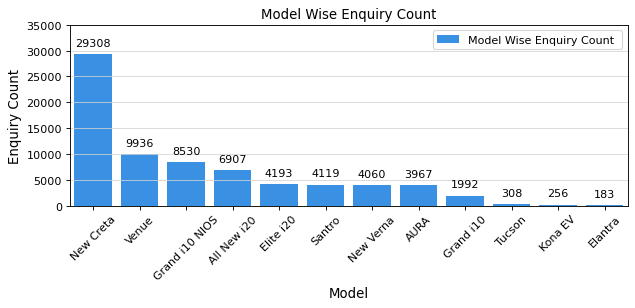

In [344]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Enquiry Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5[0:12], x = 'MODEL', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=35000, ymin=0)
ax.set_ylabel('Enquiry Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Model Wise Enquiry Count "],loc="upper center", bbox_to_anchor=(0.82, 1.0))
plt.title("Model Wise Enquiry Count",fontsize=12)

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart20.jpg", bbox_inches='tight')
plt.show()


In [345]:
df5['Enquiry Count'].sum()

73939

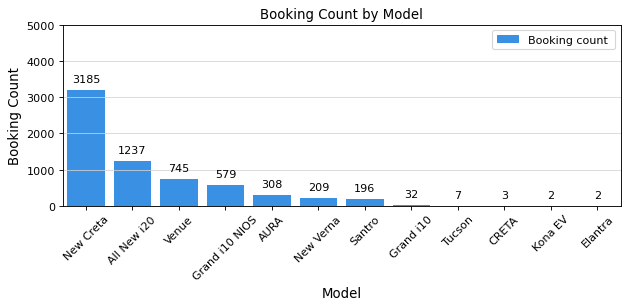

In [346]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Booking Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5[0:12], x = 'MODEL', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=5000, ymin=0)
ax.set_ylabel('Booking Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Booking count "],loc="upper center", bbox_to_anchor=(0.88, 1.0))
plt.title("Booking Count by Model",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#21.jpg", bbox_inches='tight')
plt.show()


In [ ]:
df5.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last') 


In [350]:
df5['Booking Count'].sum()

6506.0

In [ ]:
df_model_e2b1 = df5.copy()

In [ ]:
df_model_e2b1.drop(df_model_e2b1.loc[df_model_e2b1['MODEL']=='Elite i20'].index,inplace=True)

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_model_e2b1[0:11].plot(kind='bar',x='MODEL',y='Enq to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Ratio", fontsize=12)
plt.xlabel("Model", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.3, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Model Wise Enquiry to Booking Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#22.jpg", bbox_inches='tight')      
plt.show()

In [ ]:
df6 = pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "variant_final")

In [ ]:
df6.head()

In [ ]:
df_var = {'Variant Type':['Low', 'Med', 'High'],
        'Enquiry Count':[27140,25788,10884],
        'Booking Count':[2115,2472,1211],
        'Enquiry to Booking Ratio':[0.033144,0.038739,0.018978]}

In [ ]:
df_variant = pd.DataFrame(df_var)

In [ ]:
df_variant

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=40000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Enquiry count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#23.jpg", bbox_inches='tight')       
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=5000, ymin=1000)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant wise booking count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#24.jpg", bbox_inches='tight')       
plt.show()

In [ ]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Conversion Ratio", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#25.jpg", bbox_inches='tight')       
plt.show()

In [ ]:
df7 = pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "body_final")

In [ ]:
df7.head()

In [ ]:
df_bod = {'Body Type':['HatchBack', 'Sedan', 'SUV'],
        'Enquiry Count':[25741,8468,39552],
        'Booking Count':[2044,522,3940],
        'Enq to Booking Ratio':[0.027711,0.007077,0.05341649807]}

In [ ]:
df_body = pd.DataFrame(df_bod)

In [ ]:
df_body

In [ ]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=50000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Enquiry Count")
ax.legend(["Body Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#26body.jpg", bbox_inches='tight') 
plt.show()

In [ ]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=4000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Booking Count")
ax.legend(["Body Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#27body.jpg", bbox_inches='tight') 
plt.show()

In [ ]:

# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_body, x = 'Body Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Conversion Ratio", fontsize=12)
plt.xlabel("Body Type", fontsize = 12)
plt.xticks(rotation=0)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
#ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Body Type Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
        
plt.savefig("#28body.jpg", bbox_inches='tight')       
plt.show()




In [ ]:
df7 = pd.read_excel("CTB_monthly_report_may.xlsx", sheet_name = "fuel_final")

In [ ]:
df7.head(2)

In [ ]:
df7.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last')

In [ ]:
#df_fuel_elec.drop(df_fuel_elec.loc[df_fuel_elec['Fuel Type']=='Electric'].index,inplace=True)

In [ ]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=60000, ymin=0)
plt.title("Fuel Type Enquiry Count")
#ax.legend(["Fuel Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.5, 1.2))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart29.jpg", bbox_inches='tight')
plt.show()

In [ ]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=5000, ymin=0)
plt.title("Fuel Type Booking Count")
#ax.legend(["Fuel Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#29fuel.jpg", bbox_inches='tight')
plt.show()

In [ ]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 2.5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.9, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
#ax.legend(["Fuel Type Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.title("Fuel Type Booking Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

In [ ]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.08, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.title("Fuel Type Coverstion Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

## Zone

In [ ]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

In [ ]:
frames = [GDMS_booking_north, GDMS_booking_east,GDMS_booking_west,GDMS_booking_south, GDMS_booking_central]

In [ ]:
ctb_zones = pd.concat(frames)

In [ ]:
ctb_zones

In [ ]:
df8 = pd.read_excel("CTB_auto_monthly_report_may_Zone.xlsx", sheet_name = "GDMS_booking_north")

In [ ]:
df8.head(14)

In [ ]:
df8 = df8.reindex(index=order_by_index(df8.index, index_natsorted(df8.BKNG_DATE_NEWMonthKey)))



In [ ]:
df8.BKNG_DATE_NEWMonthKey

In [ ]:
#df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'] .replace(['2020_1'], '2020_Jan')
#df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_5'], '2021_May')

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df8, marker='o', markerfacecolor='black', markersize=3, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df8, marker='d', color='grey', linestyle='dashed', label="CTB Booking",linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df8, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=200, ymin=0)
plt.title("North Zone" )
plt.ylabel("Booking Count")

# show legend
#plt.legend(['Offline Booking'\n 'Online Booking'\n 'Total Booking'],loc="upper left", bbox_to_anchor=(0.0, 1.0)
plt.legend(loc='upper left')
# show graph
plt.grid(color='lightgrey', linewidth=0.7,axis='y') 
plt.savefig("#32North.jpg", bbox_inches='tight')
plt.show()

In [ ]:
df8['Online Booking'].sum()

In [ ]:
df8['Offline Booking'].sum()

In [ ]:
df81 = pd.read_excel("CTB_auto_monthly_report_may_Zone.xlsx", sheet_name = "GDMS_booking_east")
df81 = df81.reindex(index=order_by_index(df81.index, index_natsorted(df81.BKNG_DATE_NEWMonthKey)))

In [ ]:
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_5'], '2021_May')

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df81, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df81, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df81, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=150, ymin=0)
plt.title("East Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc="upper left")
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#33East.jpg", bbox_inches='tight')
#plt.grid(color='lightgrey', linewidth=0.7)
# show graph
plt.show()

In [ ]:
df81['Online Booking'].sum()

In [ ]:
df81['Offline Booking'].sum()

In [ ]:
df82 = pd.read_excel("CTB_auto_monthly_report_may_Zone.xlsx", sheet_name = "GDMS_booking_west")

In [ ]:
df82 = df82.reindex(index=order_by_index(df82.index, index_natsorted(df82.BKNG_DATE_NEWMonthKey)))

In [ ]:
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_5'], '2021_May')                                                                      

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df82, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df82, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df82, marker='x', color='royalblue', linewidth=2)
plt.title("West Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#33Westzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [ ]:
df82['Online Booking'].sum()

In [ ]:
df82['Offline Booking'].sum()

In [ ]:
df83 = pd.read_excel("CTB_auto_monthly_report_may_Zone.xlsx", sheet_name = "GDMS_booking_south")

In [ ]:
df83 = df83.reindex(index=order_by_index(df83.index, index_natsorted(df83.BKNG_DATE_NEWMonthKey)))

In [ ]:
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_5'], '2021_May')

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df83, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df83, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df83, marker='x', color='royalblue', linewidth=2)
plt.title("South Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend()
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#34southzone.jpg", bbox_inches='tight')

# show graph
plt.show()

In [ ]:
df83['Online Booking'].sum()

In [ ]:
df83['Offline Booking'].sum()

In [ ]:
df84 = pd.read_excel("CTB_auto_monthly_report_may_Zone.xlsx", sheet_name = "GDMS_booking_central")

In [ ]:
df84 = df84.reindex(index=order_by_index(df84.index, index_natsorted(df84.BKNG_DATE_NEWMonthKey)))

In [ ]:
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_1'], '2020_Jan')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_5'], '2021_May')

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df84, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df84, marker='d', color='grey',linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df84, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=250, ymin=0)
plt.title("Central Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#35Centralzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [ ]:
df84['Online Booking'].sum()

In [ ]:
df84['Offline Booking'].sum()

## EBR

In [ ]:
df

EBR COUNT FOR MARCH 

E - 355252
B - 80431
R - 53499

NOTE : Pure offline = E - (CTB+FINANCE)
FOR EG: feb
355239 - 6008 = 349231 

In [ ]:
xEQ_Pure_Offline = 141560 - 4802
xEQ_Pure_Offline

In [ ]:
xBook_Pure_Offline = 21954- 373
xBook_Pure_Offline

In [ ]:
xRetail_Pure_Offline = 15693-110
xRetail_Pure_Offline

In [ ]:
import pandas as pd
  
# intialise data of lists.
df_EBR = {'Month':['Jan20', 'Feb20', 'Mar20', 'Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21','May21'],
        'EQ_Pure_Offline':[331139,342730,283911,20818,95886,275224,287142,289506,336103,337111,347013,411500,353202,349231,349337,279637,136758],
        'EQ_CTB_generated':[191,350,688,4051,2224,5888,4902,4869,6012,8590,6887,9314,6006,6008,6047,5921,4802],
        'Book_Pure_Offline':[52318,51783,48670,1056,14906,46980,57238,66792,56737,73108,84866,82734,78059,78579,79826,55460,21581],
        'Book_CTB_generated':[1,8,39,59,90,229,317,376,465,951,764,565,517,567,605,580,373],
        'Retail_Pure_Offline':[41000,38498,20352,36,10792,30823,37374,43400,37958,53650,55312,56849,47283,50588,53257,41581,15583],
        'Retail_CTB_generated':[1,3,2,0,30,106,159,219,212,274,296,297,243,229,242,209,110],
         'Month_y':['2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr','2020-May','2020-Jun','2020-Jul','2020-Aug','2020-Sep','2020-Oct','2020-Nov','2020-Dec','2021-Jan','2021-Feb','2021-Mar','2021-Apr','2021-May']}
  
# Create DataFrame
EBR = pd.DataFrame(df_EBR)
EBR




In [ ]:
EBR['Offline EB'] = (EBR['Book_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online EB'] = (EBR['Book_CTB_generated']/EBR['EQ_CTB_generated']).round(2)
EBR['Offline ER'] = (EBR['Retail_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online ER'] = (EBR['Retail_CTB_generated']/EBR['EQ_CTB_generated']).round(2)

In [ ]:
EBR

Offline EB = Dealer Enquiry to Booking Ratio
Online EB = CTB Enquiry to Booking Ratio
Offline ER  = Dealer Enquiry to Retail Ratio
Online ER =  CTB Enquiry to Retail Ratio

In [ ]:
EBR.to_excel("EBR_May.xlsx")

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline EB', linewidth=3, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='grey', markersize=6)
EBR.plot(kind='line',x='Month',y='Online EB', linewidth=3,legend=False, color='royalblue', ax=ax, marker='x', markerfacecolor='grey', markersize=6)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(17), EBR['Month'][0:17], rotation=0)
ax.legend(['Dealer Enquiry to Booking Ratio', 'CTB Enquiry to Booking Ratio'],loc='upper center', bbox_to_anchor=(0.28, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
#plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#ebr_eb.png", bbox_inches='tight')
plt.show()

In [ ]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline ER', linewidth=3, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='gray', markersize=6)
EBR.plot(kind='line',x='Month',y='Online ER', linewidth=3,legend=False, color='royalblue', marker='x', markerfacecolor='gray', markersize=6, ax=ax)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(17), EBR['Month'][0:17], rotation=0)
ax.legend(['Dealer Enquiry to Retail Ratio', 'CTB Enquiry to Retail Ratio'],loc='upper center', bbox_to_anchor=(0.265, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
#plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
#plt.savefig("#17.png", bbox_inches='tight')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#ebr_er.png", bbox_inches='tight')
plt.show()

In [ ]:
EBR['EB_Diff'] = EBR['Offline EB'] - EBR['Online EB']
EBR['ER_Diff'] = EBR['Offline ER'] - EBR['Online ER']

In [ ]:
EBR['EB_Diff'] = (EBR['EB_Diff'])*100
EBR['EB_Diff'] = EBR['EB_Diff'].round(2).astype(str)+ '%'

In [ ]:
EBR['ER_Diff'] = (EBR['ER_Diff'])*100
EBR['ER_Diff'] = EBR['ER_Diff'].round(2).astype(str)+ '%'

In [ ]:
EBR=EBR[['Month','EB_Diff','ER_Diff']]

In [ ]:
EBR.to_excel("EBR_Diff.xlsx")

## CUSTOMER INSIGHT

## GCRM DATASET

In [ ]:
## for april only

In [259]:
GCRMall_1 = pd.read_excel("GCRM_till_Mar21.xlsx", encoding = "ISO-8859-1")
print(GCRMall_1.shape)
GCRMall_1.head(2)

(224532, 6)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
0,0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN
1,1,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN


In [260]:
#april
GCRMall_2 = pd.read_excel('CTB_Customer_data_20210510.xlsx')

In [261]:
now = pd.Timestamp('now')
GCRMall_2['BIRTH_DT'] = pd.to_datetime(GCRMall_2['BIRTH_DT'], errors ="coerce") 
GCRMall_2['BIRTH_DT'] = GCRMall_2['BIRTH_DT'].where(GCRMall_2['BIRTH_DT'] < now, GCRMall_2['BIRTH_DT'] -  np.timedelta64(100, 'Y'))   # 2
GCRMall_2['AGE'] = (now - GCRMall_2['BIRTH_DT']).astype('<m8[Y]')    # 3
GCRMall_2.head()

,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,SEX_MF,BIRTH_DT,OCCUPATION,AGE
0,HIREN K. SHAH,9.000000e+00,example@example.com,M,NaT,NaN,NaN
1,SHUBHI GUPTA,5.910559e+08,no@email.com,W,NaT,NaN,NaN
2,SUMANTHSOLD THE CAR,1.212121e+09,no@email.com,M,NaT,NaN,NaN
3,KHALIQUZZAMAN AZMI SOLD ..,1.234568e+09,wasiazmi@gmail.com,M,NaT,NaN,NaN
4,SAHIL YASIN MANSURI,1.234568e+09,abc@mail.com,M,NaT,NaN,NaN


In [262]:
frames = [GCRMall_1,GCRMall_2]
#frames = [GCRM33]
GCRMall = pd.concat(frames)
print(GCRMall.shape)
print("AGE :", GCRMall.AGE.notna().sum())
print("OCC :", GCRMall.OCCUPATION.notna().sum())
print(GCRMall.columns)
GCRMall.head(2)

(230679, 8)
AGE : 11924
OCC : 17527
Index(['Unnamed: 0', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE',
       'OCCUPATION', 'SEX_MF', 'BIRTH_DT'],
      dtype='object')


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
0,0.0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN,NaN,NaT
1,1.0,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN,NaN,NaT


In [263]:
GCRMall.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [264]:
GCRMall_april = GCRMall.copy()


In [265]:
#GCRMall_april.to_excel("GCRM_till_Apr21.xlsx")

In [268]:
#Gcrm may

In [269]:
GCRM_may =pd.read_excel("GCRM_may.xltm")

In [270]:
now = pd.Timestamp('now')
GCRM_may['BIRTH_DT'] = pd.to_datetime(GCRM_may['BIRTH_DT'], errors ="coerce") 
GCRM_may['BIRTH_DT'] = GCRM_may['BIRTH_DT'].where(GCRMall_2['BIRTH_DT'] < now, GCRM_may['BIRTH_DT'] -  np.timedelta64(100, 'Y'))   # 2
GCRM_may['AGE'] = (now - GCRM_may['BIRTH_DT']).astype('<m8[Y]')    # 3
GCRM_may.head()

,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,SEX_MF,BIRTH_DT,OCCUPATION,AGE
0,GANESH PATEL,0.000000e+00,noemail@yahoo.com,M,NaT,NaN,NaN
1,Vivek Chauhan,8.077714e+08,vc13062000@gmail.com,M,NaT,NaN,NaN
2,PAWAN KUMAR,6.002571e+09,pawankumarsinghjee@gmail.com,NaN,NaT,NaN,NaN
3,Vijay bhardwaj,6.005176e+09,vishalbhardwaj92330@gmail.com,NaN,NaT,NaN,NaN
4,Namandeep Singh,6.005359e+09,powerboster777@gmail.com,M,NaT,NaN,NaN


In [271]:
frames = [GCRMall_1,GCRMall_april,GCRM_may]
#frames = [GCRM33]
GCRMall = pd.concat(frames)
print(GCRMall.shape)
print("AGE :", GCRMall.AGE.notna().sum())
print("OCC :", GCRMall.OCCUPATION.notna().sum())
print(GCRMall.columns)
GCRMall.head(2)

(459866, 8)
AGE : 23803
OCC : 35010
Index(['Unnamed: 0', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE',
       'OCCUPATION', 'SEX_MF', 'BIRTH_DT'],
      dtype='object')


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
0,0.0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN,NaN,NaT
1,1.0,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN,NaN,NaT


In [272]:
GCRMall_unq = GCRMall.drop_duplicates(subset=['CELL_PH_NUM', 'EMAIL_ADDR'], keep='last')
print(GCRMall_unq.shape)
print("AGE :", GCRMall_unq.AGE.notna().sum())
print("OCC :", GCRMall_unq.OCCUPATION.notna().sum())

print(" ")
GCRMall_unq1 = GCRMall.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(GCRMall_unq1.shape)
print("AGE :", GCRMall_unq1.AGE.notna().sum())
print("OCC :", GCRMall_unq1.OCCUPATION.notna().sum())

(166716, 8)
AGE : 9504
OCC : 14189
 
(69213, 8)
AGE : 4053
OCC : 4686


In [273]:
AGE = GCRMall[GCRMall["AGE"].notna()]
#AGE = GCRMall[GCRMall["AGE"]>0]
print(AGE.shape)
AGE.head(2)

(23803, 8)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
12,12.0,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen,NaN,NaT
39,39.0,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT


In [274]:
AGE["AGE_INT"] = AGE["AGE"].astype(int)

In [275]:
AGE.to_excel("AGE_May.xlsx")

In [276]:
AGE1 = AGE[AGE.AGE_INT.astype(str).str.isdigit()]
AGE1.shape

(23803, 9)

In [277]:
age_unq = AGE1.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(age_unq.shape)
age_unq.head(2)

(5954, 9)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,AGE_INT
39,NaN,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT,35
64,NaN,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government,NaN,NaT,34


In [278]:
age_unq18 = age_unq[(age_unq["AGE"].astype(int)>18) & (age_unq["AGE"].astype(int)<100)]
age_unq18.shape

(5780, 9)

In [279]:
apr_custonly.drop(['_merge'], axis=1,inplace = True)

In [280]:
CTB_age0 = pd.merge(CTB_data, age_unq18, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(CTB_age0.shape)
CTB_age0['_merge'].value_counts()

(77480, 55)


left_only     70824
right_only     3541
both           3115
Name: _merge, dtype: int64

In [281]:
age_unq18.columns

Index(['Unnamed: 0', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE',
       'OCCUPATION', 'SEX_MF', 'BIRTH_DT', 'AGE_INT'],
      dtype='object')

In [282]:
CTB_age0.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'Unnamed: 0', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR',
       'AGE', 'OCCUPATION', 'SEX_MF', 'BIRTH_DT', 'AGE_INT', '_merge'],
      dtype='object')

In [283]:
CTB_ageBoth_enq = CTB_age0.copy()
CTB_age_enqGBY = CTB_ageBoth_enq[['ORDER_ID','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",CTB_age_enqGBY.ORDER_ID.sum())
print(CTB_age_enqGBY.shape)
CTB_age_enqGBY

total enquiry :  3115
(62, 2)


,AGE_INT,ORDER_ID
0,19.0,1
1,20.0,13
2,21.0,14
3,22.0,26
4,23.0,40
...,...,...
57,77.0,0
58,78.0,3
59,81.0,0
60,82.0,0


In [284]:
CTB_GDMS.drop(['_merge'], axis=1,inplace = True)
book_age = pd.merge(CTB_GDMS, age_unq18, left_on=['CUSTOMER_EMAIL'] ,right_on = ['EMAIL_ADDR'], how = 'outer', indicator= True)
print(book_age.shape)
book_age['_merge'].value_counts()

(77503, 82)


left_only     70824
right_only     3540
both           3139
Name: _merge, dtype: int64

In [285]:
book_ageBoth = book_age[book_age["_merge"]=="both"]
print(book_ageBoth.shape)
book_ageBoth.head(2)

(3139, 82)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,AGE_INT,_merge
17,C1101,Central RO1,N1230,LAMBA HYUNDAI,DEEPAK SHARMA,Delhi,Delhi,ORD2021011415595975,2021-01-14 23:01:08,Open,...,NaN,Sushil Kumar Singh,8.860558e+09,sushil.alld@gmail.com,38.0,NaN,NaN,NaT,38.0,both
64,W1101,West RO1,E5222,GOYAL HYUNDAI,Pooja Singh,Chhattisgarh,Raigarh,ORD2021011517678404,2021-01-15 15:38:31,Open,...,NaN,R. KUMAR,8.800271e+09,vu2rje@yahoo.com,33.0,NaN,NaN,NaT,33.0,both


In [286]:
book_ageBoth1 = book_ageBoth.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
book_ageBoth1.shape

(2240, 82)

In [287]:
book_ageBoth1.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO',
       'EQRY_DATE', 'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE',
       'EQCR_MODEL_NAME', 'EQRY_NEWCAR_Y

In [289]:
book_ageBothGBY = book_ageBoth1[['EQRY_ENQRY_NO','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",book_ageBothGBY["EQRY_ENQRY_NO"].sum())
print(book_ageBothGBY.shape)
book_ageBothGBY

total enquiry :  513
(58, 2)


,AGE_INT,EQRY_ENQRY_NO
0,19.0,1
1,20.0,3
2,21.0,0
3,22.0,2
4,23.0,5
5,24.0,5
6,25.0,16
7,26.0,13
8,27.0,25
9,28.0,31


In [290]:
Age_Trend = pd.merge(CTB_age_enqGBY, book_ageBothGBY, left_on=['AGE_INT'],right_on = ['AGE_INT'], how = 'outer',indicator=True,)
Age_Trend["EQRY_ENQRY_NO"].fillna(0,inplace=True)
print(Age_Trend['_merge'].value_counts())
Age_Trend

both          58
left_only      4
right_only     0
Name: _merge, dtype: int64


,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,19.0,1,1.0,both
1,20.0,13,3.0,both
2,21.0,14,0.0,both
3,22.0,26,2.0,both
4,23.0,40,5.0,both
...,...,...,...,...
57,77.0,0,0.0,left_only
58,78.0,3,0.0,both
59,81.0,0,0.0,left_only
60,82.0,0,0.0,left_only


In [291]:
Age_Trend.to_excel("Age_Trend_till_May.xlsx")

In [292]:
OCC = GCRMall[GCRMall["OCCUPATION"].notna()]
print(OCC.shape)
OCC.head(2)

(35010, 8)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
12,12.0,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen,NaN,NaT
39,39.0,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT


In [293]:
occ_unq = OCC.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(occ_unq.shape)
occ_unq.head(2)

(6645, 8)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
39,NaN,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT
64,NaN,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government,NaN,NaT


In [294]:
CTB_occ = pd.merge(CTB_data, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
CTB_occ.shape

(78103, 54)

In [295]:
CTB_occ['_merge'].value_counts()

left_only     70435
right_only     4164
both           3504
Name: _merge, dtype: int64

In [296]:
CTB_occBoth_enq = CTB_occ[CTB_occ["_merge"]=="both"]
print(CTB_occBoth_enq.shape)
CTB_occBoth_enq.head(2)

(3504, 54)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,_ORDER _ID,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,_merge
31,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Vishal Vijay Patole,Maharashtra,Ahmednagar,ORD2021011313377226,2021-01-13 22:59:46,Open,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both
32,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Jagdish Jedhe,Maharashtra,Ahmednagar,ORD2021011312244073,2021-01-13 22:56:12,Cancellation,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both


In [297]:
CTB_occBoth_enq1 =  CTB_occBoth_enq.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
CTB_occBoth_enq1.shape

(2481, 54)

In [298]:
CTB_occ_enqGBY = CTB_occBoth_enq1[['ORDER_ID','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total enquiry : ",CTB_occ_enqGBY.ORDER_ID.sum())
print(CTB_occ_enqGBY.shape)
CTB_occ_enqGBY

total enquiry :  2481
(50, 2)


,OCCUPATION,ORDER_ID
0,Business men- indust w/ 10 or more Emp,9
1,Business with 1-9 employees,3
2,Businessmen,541
3,Busmen Indust W/ 1~9 Emp,2
4,Busmen- indust w/ 1~9 Emp,7
5,Busmen- indust w/ No emp,18
6,Chartered Accountant,1
7,Clerical/Salesmen,2
8,College Teacher,3
9,Corporate- Junior /Middle Management,3


In [299]:
book_occ = pd.merge(CTB_GDMS, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(book_occ.shape)
book_occ['_merge'].value_counts()

(78126, 81)


left_only     70435
right_only     4163
both           3528
Name: _merge, dtype: int64

In [300]:
book_occBoth = book_occ[book_occ["_merge"]=="both"]
print(book_occBoth.shape)
book_occBoth.head(2)

(3528, 81)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BKNG_DATE_NEWWeekKey,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,_merge
31,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Vishal Vijay Patole,Maharashtra,Ahmednagar,ORD2021011313377226,2021-01-13 22:59:46,Open,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both
32,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Jagdish Jedhe,Maharashtra,Ahmednagar,ORD2021011312244073,2021-01-13 22:56:12,Cancellation,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both


In [301]:
book_occBoth.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO',
       'EQRY_DATE', 'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE',
       'EQCR_MODEL_NAME', 'EQRY_NEWCAR_Y

In [302]:
book_occBoth1 = book_occBoth.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
book_occBoth1.shape

(656, 81)

In [303]:
book_occBoth2 = book_occBoth.drop_duplicates(subset=['CUSTOMER_EMAIL'], keep='last')
book_occBoth2.shape

(2482, 81)

In [304]:
book_occBothGBY = book_occBoth1[['EQRY_REF_NO','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total Booking : ",book_occBothGBY["EQRY_REF_NO"].sum())
print(book_occBothGBY.shape)
book_occBothGBY

total Booking :  655
(31, 2)


,OCCUPATION,EQRY_REF_NO
0,Business men- indust w/ 10 or more Emp,2
1,Businessmen,131
2,Busmen Indust W/ 1~9 Emp,1
3,Busmen- indust w/ No emp,3
4,College Teacher,2
5,Farmer,14
6,Home Maker,11
7,Information Technology - Engineer,2
8,NRI,1
9,Officer/ExecutivesMiddle/Senior,2


In [305]:
occ_Trend = pd.merge(CTB_occ_enqGBY, book_occBothGBY, left_on=['OCCUPATION'],right_on = ['OCCUPATION'], how = 'outer',indicator=True,)
occ_Trend["EQRY_REF_NO"].fillna(0,inplace=True)
print(book_occ['_merge'].value_counts())
occ_Trend

left_only     70435
right_only     4163
both           3528
Name: _merge, dtype: int64


,OCCUPATION,ORDER_ID,EQRY_REF_NO,_merge
0,Business men- indust w/ 10 or more Emp,9,2.0,both
1,Business with 1-9 employees,3,0.0,left_only
2,Businessmen,541,131.0,both
3,Busmen Indust W/ 1~9 Emp,2,1.0,both
4,Busmen- indust w/ 1~9 Emp,7,0.0,left_only
5,Busmen- indust w/ No emp,18,3.0,both
6,Chartered Accountant,1,0.0,left_only
7,Clerical/Salesmen,2,0.0,left_only
8,College Teacher,3,2.0,both
9,Corporate- Junior /Middle Management,3,0.0,left_only


In [331]:
occ_Trend.to_excel("occ_Trend_May.xlsx")

In [307]:
df_age = pd.read_excel("Age_Trend_till_May.xlsx", sheet_name="Sheet1")

In [308]:
df_age.head(2)

,Unnamed: 0,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,0,19,1,1,both
1,1,20,13,3,both


In [309]:
df_age = df_age.rename(columns={'ORDER_ID': 'CTB Enquiry', 'EQRY_ENQRY_NO': 'CTB Booking'})
df_age

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge
0,0,19,1,1,both
1,1,20,13,3,both
2,2,21,14,0,both
3,3,22,26,2,both
4,4,23,40,5,both
...,...,...,...,...,...
57,57,77,0,0,left_only
58,58,78,3,0,both
59,59,81,0,0,left_only
60,60,82,0,0,left_only


In [310]:
df_age['CTB Enquiry'].sum()

3115

In [311]:
df_age['CTB Booking'].sum()

513

In [312]:
df_age['Enquiry Ratio'] = (df_age['CTB Enquiry']/3115)*100
df_age['Enquiry Ratio'] = df_age['Enquiry Ratio'].round(2).astype(str)+ '%'


In [313]:
df_age['Booking Ratio'] = (df_age['CTB Booking']/513)*100
df_age['Booking Ratio'] = df_age['Booking Ratio'].round(2).astype(str)+ '%'

In [314]:
df_age['Enquiry To Booking Ratio'] = (df_age['CTB Booking'] / df_age['CTB Enquiry'])*100
df_age['Enquiry To Booking Ratio'] = df_age['Enquiry To Booking Ratio'].round(2).astype(str)+ '%'
df_age.head(5)

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
0,0,19,1,1,both,0.03%,0.19%,100.0%
1,1,20,13,3,both,0.42%,0.58%,23.08%
2,2,21,14,0,both,0.45%,0.0%,0.0%
3,3,22,26,2,both,0.83%,0.39%,7.69%
4,4,23,40,5,both,1.28%,0.97%,12.5%


In [315]:
df_age_sort = df_age[(24-18):(35-18)]

In [316]:
df_age_sort

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
6,6,25,66,16,both,2.12%,3.12%,24.24%
7,7,26,89,13,both,2.86%,2.53%,14.61%
8,8,27,92,25,both,2.95%,4.87%,27.17%
9,9,28,157,31,both,5.04%,6.04%,19.75%
10,10,29,142,20,both,4.56%,3.9%,14.08%
11,11,30,159,20,both,5.1%,3.9%,12.58%
12,12,31,175,29,both,5.62%,5.65%,16.57%
13,13,32,154,18,both,4.94%,3.51%,11.69%
14,14,33,216,32,both,6.93%,6.24%,14.81%
15,15,34,187,24,both,6.0%,4.68%,12.83%


In [317]:
a = df_age_sort['CTB Enquiry'].sum()
b = df_age_sort['CTB Booking'].sum()
c = (b/a)*100
print(c)

15.75


In [318]:
df_age_sort2 = df_age[(35-18):(45-18)]

In [319]:
df_age_sort2

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
17,17,36,139,25,both,4.46%,4.87%,17.99%
18,18,37,85,20,both,2.73%,3.9%,23.53%
19,19,38,90,14,both,2.89%,2.73%,15.56%
20,20,39,80,15,both,2.57%,2.92%,18.75%
21,21,40,101,17,both,3.24%,3.31%,16.83%
22,22,41,71,9,both,2.28%,1.75%,12.68%
23,23,42,65,9,both,2.09%,1.75%,13.85%
24,24,43,43,4,both,1.38%,0.78%,9.3%
25,25,44,34,8,both,1.09%,1.56%,23.53%
26,26,45,54,8,both,1.73%,1.56%,14.81%


In [320]:
x = df_age_sort2['CTB Enquiry'].sum()
y = df_age_sort2['CTB Booking'].sum()
z = (y/x)*100
print(z)

16.92913385826772


In [329]:
df_age.to_excel("Age_may.xlsx")

In [328]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Enquiry', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=280, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Age Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
   # ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')      
plt.savefig("#14_18%.jpg", bbox_inches='tight')       
plt.show()


IndentationError: expected an indented block (<ipython-input-328-c1011a4ef8c6>, line 26)

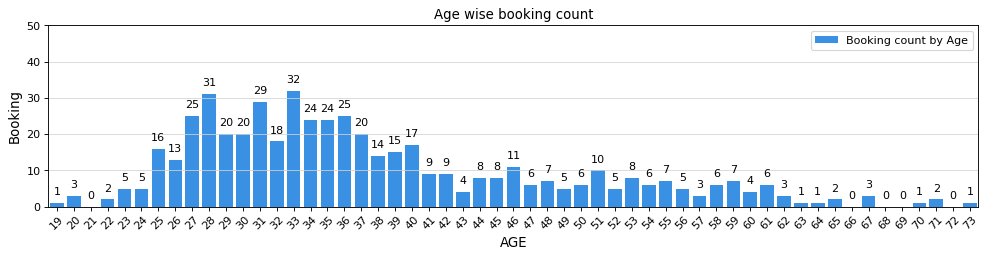

In [327]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_age[0:55], x = 'AGE_INT', y = 'CTB Booking', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Booking', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
#plt.xticks(np.arange(0, len(df_age['AGE_INT'])+1, 5))
plt.xticks(rotation=45)
plt.ylim(ymax=50, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))

#ax2 =ax.twinx()
plt.title("Age wise booking count", fontsize=12)
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
#for pos in (['top', 'bottom', 'right', 'left']):
    #ax2.spines[pos].set_edgecolor('grey') 
    
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart15.jpg", bbox_inches='tight')   

plt.show()

In [332]:
df_occ=pd.read_excel("occ_Trend_May.xlsx", sheet_name= "Sheet1")

In [333]:
df_occ

,Unnamed: 0,OCCUPATION,ORDER_ID,EQRY_REF_NO,_merge
0,0,Business men- indust w/ 10 or more Emp,9,2,both
1,1,Business with 1-9 employees,3,0,left_only
2,2,Businessmen,541,131,both
3,3,Busmen Indust W/ 1~9 Emp,2,1,both
4,4,Busmen- indust w/ 1~9 Emp,7,0,left_only
5,5,Busmen- indust w/ No emp,18,3,both
6,6,Chartered Accountant,1,0,left_only
7,7,Clerical/Salesmen,2,0,left_only
8,8,College Teacher,3,2,both
9,9,Corporate- Junior /Middle Management,3,0,left_only


In [334]:
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- CA'], 'CA')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Self Employed- Agriculturist/Farm'], 'Farmer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Professional – Architect'], 'Architect')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['NRI'], 'Others')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Sports'], 'Sports')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Professional – Writer/Author'], 'Writer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Artist', 'Professional – Artist'], 'Artist')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Lawyer', 'Professional – Lawyer'], 'Lawyer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Others', 'Other'], 'Others')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Teacher/Lecturer/Reader/Scientist', 'College Teacher', 'Profession- Teacher'], 'Teacher')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Doctor', 'Professional – Doctor'], 'Doctor')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- IT', 'Professional – Software Developers'], 'IT Sector')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Private Company', 'Supervisory Level','Clerical/Salesmen',
                                            'Corporate- Junior /Middle Management', 'Corporate– Senior Management'], 'Private Sector')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Government', 'Service-Defence', 'Government – Junior/ Middle Management',
                                            'Govt Executive – Senior Management', 'Armed Forces'], 'Govt. Job')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Police', 'Armed Forces',
                                            'Service-Defence'], 'Police/Defence')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Businessmen', 'Shop Owners','Busmen- indust w/ 1~9 Emp' ,'Busmen- indust w/ No emp', 'Petty Traders',
                                            'Business with 1-9 employees', 'Self Employed', 'Self Employed- Traders',
                                            'Business >50 employees', 'Business with 10-50 employees'], 'Businessman')


In [ ]:
df_occ.sort_values("Enquiry", axis = 0, ascending = False, inplace = True, na_position ='last') 
#df_occ = df_occ.reindex(index=order_by_index(df_occ.index, index_natsorted(df_occ.Enquiry)))

In [336]:
df_occ.rename(columns = {'ORDER_ID':'Enquiry', 'EQRY_REF_NO':'Booking'}, inplace = True)

In [337]:
df_occ['Enquiry'].sum()

2481

In [338]:
df_occ['Booking'].sum()

655

In [341]:
df_occ.Enquiry.sum()

2481

In [340]:
df_occ.to_excel("May_occuption.xlsx")


In [ ]:
#df_occ.drop(df_occ.loc[df_occ['Occupation']=='Other'].index, inplace=True)
df_occ.sort_values("OCCUPATION", axis = 0, ascending = True, inplace = False, na_position ='last')

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:16], x = 'OCCUPATION', y = 'Enquiry', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=800, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#16.jpg", bbox_inches='tight')        
plt.show()

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7.5, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:16], x = 'OCCUPATION', y = 'Booking', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=250, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Booking Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#17.png", bbox_inches='tight')
plt.show()

In [ ]:
df_occ['Enquiry:Booking (Same Occupation)'] = (df_occ['Booking'] / df_occ['Enquiry'])*100
df_occ['Enquiry:Booking (Same Occupation)'] = df_occ['Enquiry:Booking (Same Occupation)'].round(2).astype(str)+ '%'


In [ ]:
df_occ['Enq.:Booking (All Enquiries)'] = (df_occ['Booking'] / 2396)*100
df_occ['Enq.:Booking (All Enquiries)'] = df_occ['Enq.:Booking (All Enquiries)'].round(2).astype(str)+ '%'


In [ ]:
df_occ.to_excel("occ_tabl.xlsx")

In [ ]:
### dealer - region sep > apr changes 


In [ ]:

CTB_data.columns

In [ ]:
#Dealer wise region count from sep'20 to Apr'21
#Ctb_data_region=CTB_data[(CTB_data['ORDER_DATE']>='2020-09-01')&(CTB_data['ORDER_DATE']<='2021-04-30')|(CTB_data['ORDER_DATEMonthKey']=='2021_4')] 

In [ ]:
Ctb_data_region=CTB_data[(CTB_data['ORDER_DATE']>='2020-01-01')&(CTB_data['ORDER_DATE']<='2021-04-30')|(CTB_data['ORDER_DATEMonthKey']=='2021_4')] 

In [ ]:
Ctb_data_region.ORDER_DATEMonthKey.value_counts()

In [ ]:
Region_enq1 = Trend_Analysis_gb(Ctb_data_region,['ORDER_ID','DELR_RGON_NAME'],'','DELR_RGON_NAME','Weekly')
print("total enquiry : ",Region_enq1.ORDER_ID.sum())
Region_enq1

In [ ]:
Region_list1 = CTB_data[["DELR_RGON_NAME","DEALER_ID"]]
Region_list_uniq1 = Region_list1.drop_duplicates(subset=['DELR_RGON_NAME', 'DEALER_ID'], keep='last')
Region_list_uniq1.head(2)

In [ ]:
Region_enq1

In [ ]:
GDMS_Booking.shape

In [ ]:
GDMS_Booking['BKNG_DATE'].head(3)

In [ ]:
GDMS_booking_add_region1 = pd.merge(GDMS_booking, Region_list_uniq1, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region1.shape)
GDMS_booking_add_region1['_merge'].value_counts()

In [ ]:
#GDMS_Booking_new_1=GDMS_Booking[(GDMS_Booking['BKNG_DATE']>=20200901.0)&(GDMS_Booking['BKNG_DATE']<=20210430.0)|(GDMS_Booking['BKNG_DATE_NEWMonthKey']=='2021_4')]
#GDMS_Booking_new_1.shape

In [ ]:
#GDMS_Booking_new_1=GDMS_Booking[(GDMS_Booking['BKNG_DATE']>=20200101.0)&(GDMS_Booking['BKNG_DATE']<=20210430.0)|(GDMS_Booking['BKNG_DATE_NEWMonthKey']=='2021_4')]
#GDMS_Booking_new_1.shape

In [ ]:
GDMS_Booking_new_1['BKNG_DATE_NEWMonthKey'].value_counts()

In [ ]:
GDMS_Booking_new_1.head(3)

In [ ]:
#Ctb_data_region.columns
GDMS_Booking_new_1.columns

In [ ]:
GDMS_booking_add_region_1 = pd.merge(GDMS_Booking_new_1, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
GDMS_booking_add_region_1['_merge'].value_counts()


In [ ]:
#Region_booking = GDMS_booking_add_region_1[GDMS_booking_add_region_1["_merge"]!="both"]

In [ ]:
Region_booking = GDMS_booking_add_region_1[GDMS_booking_add_region_1["_merge"]!="both"]

In [ ]:
Region_booking = Trend_Analysis_gb(GDMS_booking_add_region_1,['EQRY_REF_NO','DELR_RGON_NAME'],'','DELR_RGON_NAME','Monthly')
Region_booking

In [ ]:
#Region_Final1 = pd.merge(Region_booking, Region_enq1, left_on=['DELR_RGON_NAME'],right_on = ['DELR_RGON_NAME'], how = 'outer',indicator=True)
#print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
#Region_Final1['_merge'].value_counts()

In [ ]:
Region_Final1 = pd.merge(Region_booking, Region_enq1, left_on=['DELR_RGON_NAME'],right_on = ['DELR_RGON_NAME'], how = 'outer',indicator=True)
#print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
Region_Final1['_merge'].value_counts()

In [ ]:
Region_Final1 = Region_Final1[Region_Final1["_merge"]=="both"]

In [ ]:
Region_Final1

In [ ]:
Region_Final1 = Region_Final1[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
Region_Final1.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
Region_enq1 = Region_Final1["Enquiry Count"].sum()
Region_book1 = Region_Final1["Booking Count"].sum()
Region_Final1["Enquiry Ratio"] = (Region_Final1["Enquiry Count"]/Region_enq1)
Region_Final1["Booking Ratio"] = (Region_Final1["Booking Count"]/Region_book1)
Region_Final1["Enq to Booking Ratio"] = (Region_Final1["Booking Count"]/Region_Final1["Enquiry Count"])
Region_Final1["Avg_Enquiry"]=Region_enq1/Region_Final1["Dealer Region Name"].count()
Region_Final1["Avg_booking"]=Region_book1/Region_Final1["Dealer Region Name"].count()
Region_Final1

In [ ]:
Region_Final1.sort_values("Booking Count", axis = 0, ascending = False, na_position ='last') 

In [ ]:
Region_Final1.to_excel("SEP-APRIL REGION.xlsx")

In [ ]:
regn_book = pd.merge(GDMS_Booking_new_1, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , regn_book.shape)
regn_book['_merge'].value_counts()

In [ ]:
regn_book = regn_book[regn_book["_merge"]=="both"]

In [ ]:
regn_book.columns

In [ ]:
Ctb_data_region.drop('_ORDER _ID',axis=1,inplace=True)

In [ ]:
def regn(dataset_enq,dataset_book,element):
    var_enq = dataset_enq[dataset_enq["DELR_RGON_NAME"] == element]
    var_book = dataset_book[dataset_book["DELR_RGON_NAME"] == element]
    Region_enq = Trend_Analysis_gb(var_enq,['ORDER_ID','DEALER_NAME'],'','DEALER_NAME','Weekly')
    #print("total enquiry : ",Region_enq.ORDER_ID.sum())
    #Region_enq
    Region_Booking = Trend_Analysis_gb(var_book,['EQRY_REF_NO','CSPM_DLR_NAME'],'','CSPM_DLR_NAME','weekly')
   # Region_Booking
    #GDMS_booking_add_region = pd.merge(, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
    #print("GDMS_add_region" , GDMS_booking_add_region.shape)
    #GDMS_booking_add_region['_merge'].value_counts()
    #GDMS_booking_add_region_bl = GDMS_booking_add_region[GDMS_booking_add_region["_merge"]!="right_only"]
    #GDMS_booking_add_region_bl.shape

    Region_final_merg_1 = Merge(Region_enq,'DEALER_NAME',Region_Booking,'CSPM_DLR_NAME','','','outer',True,'single')
    Region_final_merg_1 = Region_final_merg_1[["DEALER_NAME","ORDER_ID","EQRY_REF_NO"]]
   
    Region_final_merg_1 = Region_final_merg_1.rename(columns={'ORDER_ID': 'Enquiry Count', 'EQRY_REF_NO': 'Booking Count'})
    Region_final_merg_1.fillna(0,inplace=True)
    Region_final_merg_1.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last') 
    #Region_final = Region_final_merg[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
    #Region_final.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
    
    return Region_final_merg_1

In [ ]:
Delr_region_SRO2 = regn(Ctb_data_region,regn_book,"South RO2")
Delr_region_SRO4 = regn(Ctb_data_region,regn_book,"South RO4")
Delr_region_CRO1 = regn(Ctb_data_region,regn_book,"Central RO1")
Delr_region_CRO2 = regn(Ctb_data_region,regn_book,"Central RO2")
Delr_region_WRO1 = regn(Ctb_data_region,regn_book,"West RO1")



Delr_region_ERO1 = regn(Ctb_data_region,regn_book,"East RO1")
Delr_region_ERO2 = regn(Ctb_data_region,regn_book,"East RO2")
Delr_region_ERO3 = regn(Ctb_data_region,regn_book,"East RO1")
Delr_region_WRO2 = regn(Ctb_data_region,regn_book,"West RO2")
Delr_region_WRO3 = regn(Ctb_data_region,regn_book,"West RO3")



Delr_region_SRO1 = regn(Ctb_data_region,regn_book,"South RO1")
Delr_region_SRO3 = regn(Ctb_data_region,regn_book,"South RO3")
Delr_region_CRO3 = regn(Ctb_data_region,regn_book,"Central RO3")
Delr_region_NRO1 = regn(Ctb_data_region,regn_book,"North RO1")
Delr_region_NRO2 = regn(Ctb_data_region,regn_book,"North RO2")

Delr_region_NRO3 = regn(Ctb_data_region,regn_book,"North RO3")
Delr_region_WRO4 = regn(Ctb_data_region,regn_book,"West RO4")

In [ ]:

Delr_region_SRO4.to_excel("sro4.xlsx")

In [ ]:
Delr_region_CRO1.to_excel("cro1.xlsx")

In [ ]:
Delr_region_WRO1.to_excel("wro1.xlsx")

In [ ]:
Delr_region_CRO2.to_excel("cr02.xlsx")

In [ ]:
Delr_region_ERO1.to_excel("ero1.xlsx")

In [ ]:
Delr_region_ERO2.to_excel("ero2.xlsx")

In [ ]:
Delr_region_ERO3.to_excel("ero3.xlsx")

In [ ]:
Delr_region_WRO2.to_excel("wro2.xlsx")

In [ ]:
Delr_region_WRO4.to_excel("wro4.xlsx")

In [ ]:
Delr_region_WRO4.to_excel("wro3.xlsx")

In [ ]:
Delr_region_SRO1.to_excel("sro1.xlsx")

In [ ]:
Delr_region_SRO3.to_excel("sro3.xlsx")

In [ ]:
Delr_region_SRO4.to_excel("sro4.xlsx")

In [ ]:
Delr_region_NRO1.to_excel("nro1.xlsx")

In [ ]:
Delr_region_NRO2.to_excel("nro2.xlsx")

In [ ]:
Delr_region_NRO3.to_excel("nro3.xlsx")

In [ ]:
#Delr_region_SRO2.to_excel("sro2.xlsx")

In [ ]:
Region_booking.sort_values("EQRY_REF_NO", axis = 0, ascending = False, inplace = True, na_position ='last') 

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Region_booking.plot(kind='bar',x='DELR_RGON_NAME',y='EQRY_REF_NO', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=700, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Booking From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["Total CTB Booking "],loc="upper center", bbox_to_anchor=(0.13, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.savefig("#18.jpg", bbox_inches='tight') 
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#REGION COMPARISON - BOOKING.jpg", bbox_inches='tight') 
plt.show()

In [ ]:
Region_enq1

In [ ]:
#Region_enq1 = Region_enq1.reindex(index=order_by_index(Region_enq1.index, index_natsorted(Region_enq1.ORDER_ID
                                                                                          
                                                                                          
Region_enq1.sort_values("ORDER_ID", axis = 0, ascending = False, inplace = True, na_position ='last') 


In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Region_enq1.plot(kind='bar',x='DELR_RGON_NAME',y='ORDER_ID', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=8000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Enquiry From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["Total CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.13, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("REGION COMPARISON ENQUIRY", bbox_inches='tight')  
plt.show()

In [ ]:
CTB_GDMS.CUSTOMER_NAME


In [ ]:
# sample gender code

In [ ]:


CTB_GDMS['CSTM_NAME_first'] =CTB_GDMS['CSTM_NAME'].str.split().str[0]

CTB_GDMS['CSTM_NAME_sec'] =CTB_GDMS['CSTM_NAME'].str.split().str[1]

 

CTB_GDMS['len_first'] =CTB_GDMS['CSTM_NAME_first'].str.len()

CTB_GDMS['len_sec'] =CTB_GDMS['CSTM_NAME_sec'].str.len()

 

CTB_Reg['len_first'].value_counts()

CTB_Reg['len_sec'].value_counts()

CTB_Reg[CTB_Reg['len_first']==1]['len_sec'].value_counts()

 

CTB_Reg['actual_name'] = np.where(CTB_Reg['len_first']==1,CTB_Reg['CSTM_NAME_sec'],CTB_Reg['CSTM_NAME_first'])

CTB_Reg['actual_name_len'] = CTB_Reg['actual_name'].str.len()

CTB_Reg['actual_name_len'].value_counts()

In [ ]:
CTB_Reg['actual_name_srm'] = CTB_Reg['actual_name'].str.replace('\W', '')
CTB_Reg['actual_name_srm_len'] = CTB_Reg['actual_name_srm'].str.len()
CTB_Reg['actual_name_srm_len'].value_counts()
CTB_Reg['name_lword'] = CTB_Reg['actual_name_srm'].str[-1:]
CTB_Reg['name_lword'] = CTB_Reg['name_lword'].str.lower()
CTB_Reg[['name_lword','actual_name_srm']].head()
CTB_Reg['Gender'] = np.where((CTB_Reg.name_lword=='a')|(CTB_Reg.name_lword=='e')|(CTB_Reg.name_lword=='i')|(CTB_Reg.name_lword=='o')|(CTB_Reg.name_lword=='u'),"Female","Male")
CTB_Reg['Gender'].value_counts()
CTB_Reg[CTB_Reg['Gender']=="Female"['name_lword'].value_counts()]



In [ ]:
## Gender

In [ ]:
def Trend_Analysis_pi1(dataset, Variables,CountVariable,DateVariable, GroupbyVariable, TrendType):
    
    Trend = dataset[Variables].pivot_table(index=GroupbyVariable, columns=CountVariable, aggfunc=len, fill_value=0)
    Trend.reset_index(inplace=True)
        
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend
    

In [ ]:
CTB_GDMS['CSTM_NAME_first'] =CTB_GDMS['CUSTOMER_NAME'].str.split().str[0]
CTB_GDMS['CSTM_NAME_sec'] =CTB_GDMS['CUSTOMER_NAME'].str.split().str[1]
CTB_GDMS['len_first'] =CTB_GDMS['CSTM_NAME_first'].str.len()
CTB_GDMS['len_sec'] =CTB_GDMS['CSTM_NAME_sec'].str.len()


In [ ]:
CTB_GDMS['len_first'].value_counts()



In [ ]:
CTB_GDMS['len_sec'].value_counts()

In [ ]:
CTB_GDMS[CTB_GDMS['len_first']==1]['len_sec'].value_counts()

In [ ]:
CTB_GDMS['actual_name'] = np.where(CTB_GDMS['len_first']==1,CTB_GDMS['CSTM_NAME_sec'],CTB_GDMS['CSTM_NAME_first'])

CTB_GDMS['actual_name_len'] = CTB_GDMS['actual_name'].str.len()

CTB_GDMS['actual_name_len'].value_counts()


In [ ]:
CTB_GDMS['actual_name_srm'] = CTB_GDMS['actual_name'].str.replace('\W', '')
CTB_GDMS['actual_name_srm_len'] = CTB_GDMS['actual_name_srm'].str.len()

CTB_GDMS['actual_name_srm_len'].value_counts()

In [ ]:
CTB_GDMS['name_lword'] = CTB_GDMS['actual_name_srm'].str[-1:]
CTB_GDMS['name_lword'] = CTB_GDMS['name_lword'].str.lower()
CTB_GDMS[['name_lword','actual_name_srm']].head()



In [ ]:
CTB_GDMS['Gender'] = np.where((CTB_GDMS.name_lword=='a')|(CTB_GDMS.name_lword=='e')|(CTB_GDMS.name_lword=='i')|(CTB_GDMS.name_lword=='o')|(CTB_GDMS.name_lword=='u'),"Female","Male")
CTB_GDMS['Gender'].value_counts()




In [ ]:
58991+14972

In [ ]:
CTB_GDMS[CTB_GDMS['Gender']=="Female"]['name_lword'].value_counts()

In [ ]:
CTB_GDMS.Gender.value_counts()

In [ ]:
CTB_GDMS.columns

In [ ]:
Gender_enq = Trend_Analysis_gb(CTB_GDMS,['ORDER_ID','Gender'],'','Gender','Weekly')
print("total enquiry : ",Gender_enq.ORDER_ID.sum())
Gender_enq



In [ ]:
# month wise enquiry

In [ ]:
Gender_enq1 = Trend_Analysis_pi(CTB_GDMS,['ORDER_ID','Gender','ORDER_DATE'],'Gender','Gender','ORDER_DATE','Monthly')
print("total enquiry : ",Gender_enq1.ORDER_ID.sum())
Gender_enq1


#Monthly_trend_Booking = Trend_Analysis_pi(GDMS_Booking,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
#Monthly_trend_Booking.columns = ['BKNG_DATE_NEWMonthKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

In [ ]:
# enquiry overall 
Gender_enq = Trend_Analysis_gb(CTB_GDMS,['ORDER_ID','Gender'],'','Gender','Weekly')
print("total enquiry : ",Gender_enq.ORDER_ID.sum())
Gender_enq



In [ ]:
## overall book

In [ ]:
Gender_book = Trend_Analysis_gb(CTB_GDMS,['EQRY_REF_NO','Gender'],'','Gender','Weekly')
Gender_book

In [ ]:
## month wise booking

In [ ]:
Gender_book1 = Trend_Analysis_pi(CTB_GDMS,['EQRY_REF_NO','Gender','BKNG_DATE'],'Gender','Gender','BKNG_DATE','Monthly')
print("total enquiry : ",Gender_book1.EQRY_REF_NO.sum())
Gender_book1

In [ ]:
Gender_book1 = Gender_book1.reindex(index=order_by_index(Gender_book1.index, index_natsorted(Gender_book1.BKNG_DATE)))

In [ ]:
Gender_book1

Gender_book1['BKNG_DATE'] = Gender_book1['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +Gender_book1['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +Gender_book1['BKNG_DATE'].map(lambda x: str(x)[6:8])
Gender_book1['BKNG_DATE'].head(2)

In [ ]:
Gender_book1

In [ ]:
Gender_book1.to_excel("Gender Bookin.xlsx")

In [ ]:
Gender_enq1.to_excel("Gender Enquiry.xlsx")

In [ ]:
Gender_merg_final = Merge(Gender_enq1,'Gender',Gender_book1,'Gender','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Gender_merg_final

In [ ]:
Gender_merg_final111 = Merge(Gender_enq,'Gender',Gender_book,'Gender','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Gender_merg_final111

In [ ]:
Gender_final = Gender_merg_final[["Gender","ORDER_ID","EQRY_REF_NO"]]
Gender_final.columns = ['Gender','Enquiry Count','Booking Count']
#Region_enq = Gender_final["Enquiry Count"].sum()
#Region_book = Gender_final["Booking Count"].sum()
Gender_final["Enquiry Ratio"] = (Gender_final["Enquiry Count"]/Gender_final["Enquiry Count"].sum())
Gender_final["Booking Ratio"] = (Gender_final["Booking Count"]/Gender_final["Booking Count"].sum())
Gender_final["Enq to Booking Ratio"] = (Gender_final["Booking Count"]/Gender_final["Enquiry Count"])
#Region_final["Avg_Enquiry"]=Region_enq/Region_final["Dealer Region Name"].count()
#Region_final["Avg_booking"]=Region_book/Region_final["Dealer Region Name"].count()
Gender_final

In [ ]:
Gender_final['Booking Count'].sum()

In [ ]:
#CHART

In [ ]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.xticks(rotation=45)

#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=Gender_final, x = 'Gender', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("Enquiry to booking %", fontsize=12)#
plt.xlabel("Gender", fontsize = 12)        
plt.ylim(ymax=0.15, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Gender wise Enquiry to booking Ratio")
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#GENDER E2B.jpg", bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Gender_final.plot(kind='bar',x='Gender',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)#
plt.xlabel("Gender", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=70000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Gender wise CTB Enquiry From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.123, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("Gender Enquiry.jpg", bbox_inches='tight')
plt.show()

In [ ]:
GDMS_Booking.EQRY_REF_NO.count()

In [ ]:
df

In [ ]:
dealer = pd.read_excel("Sales_dealer.xltm")

In [ ]:
dealer

In [ ]:
GDMS_Booking

In [ ]:
ctb_book = pd.merge(GDMS_Booking,dealer,left_on='EQRY_DLR_NO',right_on='DEALER_CODE', how='outer', indicator=True)

In [ ]:
ctb_book.EQRY_REF_NO.count()

In [ ]:
ctb_book.to_excel("ctb_booking.xlsx")

In [ ]:
df['CRM Retail'].sum()

In [ ]:
6133 + 392

In [ ]:
2536+179

In [ ]:
2525+179

In [ ]:
CTB_data.CUSTOMER_MOBILE.nunique()

In [ ]:
73676 + 8192 + 610 